## Customer Insight Analyst/Marketing Analyst Project

By Vincent Man  

Date: 20th September 2018

As a Customer Insight Analyst for Kernal Limited, I have been requested to carry out a detailed customer analysis on behalf of client to help explore and identify targeting opportunities to drive growth penetration for key products and market segments, however, the focus is to target high value propositions at the right audience from the campaign. In this scenario, a High Value Proposition is defined as a total basket value exceeding £1,500 (Market Basket Analysis). 

Insight from the analysis will be used to determine consumer groups to be targeted for this campaign including new prospects as well as existing customers who fit the profile of high value target, but are not currently engaging or classified as high value based on their current transaction levels.

Kernal Limited needs to better understand both size of opportunity, identify treatment groups as well as make actionable recommendations for the groups. 

### Library 

In [1]:
# Import all packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set(style='darkgrid')

from datetime import datetime, timedelta
from functools import partial
to_datetime_fmt = partial(pd.to_datetime, format='%Y/%m/%d')

## Gather Data

### 1. Customer csv file

In [2]:
# Use only the neccessary variables from 'dbo_dimcustomer.csv' table
cust_usecols = [
    'CustomerKey','GeographyKey','BirthDate','MaritalStatus',
    'Gender','YearlyIncome', 'TotalChildren',
    'EnglishEducation', 'EnglishOccupation', 'HouseOwnerFlag',
    'NumberCarsOwned', 'DateFirstPurchase', 'CommuteDistance'
]

In [3]:
# Import and read csv file into a dataframe that contains Customers' information
cust = pd.read_csv('dbo_dimcustomer.csv', encoding='iso-8859-1', usecols=cust_usecols)

### 2. Product csv file

In [4]:
# Use only the neccessary variables from 'dbo_dimproduct.csv' table
product_usecols = [
    'ProductKey', 'ProductSubcategoryKey','EnglishProductName'
                  ]

In [5]:
# Import and read csv file into a dataframe that contains Product information
product = pd.read_csv('dbo_dimproduct.csv', encoding='iso-8859-1', usecols=product_usecols)

### 3. Product Category csv file

In [6]:
# Use only the neccessary variables from 'dbo_dimproductcategory.csv' table
product_cat_usecols = ['ProductCategoryKey','EnglishProductCategoryName']

In [7]:
# Import and read csv file into a dataframe that contains Product Category information
product_cat = pd.read_csv('dbo_dimproductcategory.csv', usecols=product_cat_usecols)

### 4. Product SubCategory csv file

In [8]:
# Use only the neccessary variables from 'dbo_dimproductsubcategory.csv' table
product_subcat_usecols = [
    'ProductSubcategoryKey','EnglishProductSubcategoryName','ProductCategoryKey'
]

In [9]:
# Import and read csv file into a dataframe that contains Product SubCategory information
product_subcat = pd.read_csv('dbo_dimproductsubcategory.csv', encoding='iso-8859-1', usecols=product_subcat_usecols)

### 5. Fact Internet Sales csv file

In [10]:
# Use only the neccessary variables from 'dbo_factinternetsales.csv' table
fis_usecols = [
    'ProductKey', 'OrderDateKey', 'CustomerKey', 'PromotionKey', 'SalesTerritoryKey',
     'SalesOrderNumber', 'SalesOrderLineNumber', 'RevisionNumber','OrderQuantity', 
     'UnitPrice', 'TotalProductCost','OrderDate'
]

In [11]:
# Import and read csv file into a dataframe that contains Fact Internet Sales information
fis = pd.read_csv('dbo_factinternetsales.csv', usecols=fis_usecols)

### 6. Date csv file

In [12]:
# Use only the neccessary variables from 'dbo.DimDate.csv' table
dim_date_usecols = [
    'DateKey','EnglishDayNameOfWeek','DayNumberOfMonth',
    'MonthNumberOfYear','CalendarYear'
]

In [13]:
# Import and read csv file into a dataframe that contains Date information
dim_date = pd.read_csv('dbo.DimDate.csv', encoding='iso-8859-1', usecols=dim_date_usecols)

### 7. Promotion csv file 

In [14]:
# Use only the neccessary variables from 'dbo.DimPromotion.csv' table
dim_promotion_usecols = [
    'PromotionKey', 'EnglishPromotionName','EnglishPromotionType', 
    'EnglishPromotionCategory'
]

In [15]:
# Import and read csv file into a dataframe that contains Promotion information
dim_promotion = pd.read_csv('dbo.DimPromotion.csv', usecols=dim_promotion_usecols)

### 8. Sales Territory csv file

In [16]:
# Use only the neccessary variables from 'dbo_dimsalesterritory.csv' table
sales_territory_usecols = [
    'SalesTerritoryKey','SalesTerritoryCountry'
]

In [17]:
# Import and read csv file into a dataframe that contains Sales Territory information
sales_territory = pd.read_csv('dbo_dimsalesterritory.csv', usecols=sales_territory_usecols)

### 9. Geography csv file

In [18]:
# Use only the neccessary variables from 'dbo_dimgeography.csv' table
geo_usecols = ['GeographyKey','EnglishCountryRegionName','SalesTerritoryKey']

In [19]:
# Import and read csv file into a dataframe that contains Geography information
geo = pd.read_csv('dbo_dimgeography.csv', encoding='iso-8859-1', usecols=geo_usecols)

## Join Tables

### 1. Join Product Category AND Product Subcategory Tables

In [20]:
# Using an Outer join to merge Product Category and Product SubCategory using the Key 'ProductCategoryKey'
product_cat_subcat = pd.merge(product_cat, product_subcat, on=['ProductCategoryKey'], how='outer')

### 2. Join Product AND Product Category, Subcategory Tables

In [21]:
# Using a Left join to merge Product AND Product Category&SubCategory using the Key 'ProductSubcategoryKey'
prod_sub_cat = pd.merge(product, product_cat_subcat, on='ProductSubcategoryKey', how='left')

### 3. Join Fact Internet Sales AND Product, Category, SubCategory Tables

In [22]:
# Using a Left join to merge Fact Internet Sales AND Product, Product Category&SubCategory using the Key 'ProductKey'
fis_prod_sub_cat = pd.merge(fis, prod_sub_cat, on='ProductKey', how='left')

### 4. Join Fact Internet Sales, Product, Category, SubCategory AND Date Tables

In [23]:
# Using a Left join to merge Fact Internet Sales, Product, Category, SubCategory AND Date using the Keys 'OrderDateKey' & 'DateKey'
fis_prod_subcat_dimdate = pd.merge(fis_prod_sub_cat, dim_date, left_on='OrderDateKey', right_on='DateKey', how='left')

### 5. Join Fact Internet Sales, Product, Category, SubCategory, Date AND Promotion Tables

In [24]:
# Using a Left join to merge Fact Internet Sales, Product, Category, SubCategory, Date, 
# Currency AND Promotion using the Key 'PromotionKey'
fis_prod_subcat_dimdate_promo = pd.merge(fis_prod_subcat_dimdate, dim_promotion, on='PromotionKey', how='left')

### 6. Join Sales Territory AND Geography Tables

In [25]:
# Using an Inner join to merge Sales Territory AND Geography using the Key 'SalesTerritoryKey'
sales_territory_geo = pd.merge(geo,sales_territory, on='SalesTerritoryKey', how='inner')

### 7. Join Customer AND Sales Territory, Geography Tables

In [26]:
# Using a Left join to merge Customer AND Sales Territory, Geography using the Key 'GeographyKey'
cust_sales_territory_geo = pd.merge(cust, sales_territory_geo, on='GeographyKey', how='left')

### 8. Join Customer, Sales Territory, Geography AND Fact Internet Sales, Product, Category, SubCategory, Date, Promotion Tables

In [27]:
# Using a Left join to merge Customer, Sales Territory, Geography AND Fact Internet Sales, 
# Product, Category, SubCategory, Date, Promotion using the Keys 'CustomerKey' & 'SalesTerritoryKey
master_df = pd.merge(cust_sales_territory_geo, fis_prod_subcat_dimdate_promo,
                          on=['CustomerKey','SalesTerritoryKey'], how='left')

## Assess Data 

## Issues  

1. Variables of Birthdate, DateFirstPurchase and OrderDate should be converted to datetime
2. Rename and shorten lengthy variable names 
3. Create and calculate the variable Profit  
4. Round UnitPrice, TotalProductCost and Profit to two decimal points
5. Create and calculate Age 
6. Define function and create 4 different age groups
7. Create and calculate Account_Length
8. Define function and create TypeOfEarner
9. Concatenate Gender and MaritalStatus together to create Status_Gender 
10. Convert the following float type variables to integers

In [28]:
# Shape
print(master_df.shape)

(60398, 39)


In [29]:
# List all of the variables
master_df.columns

Index(['CustomerKey', 'GeographyKey', 'BirthDate', 'MaritalStatus', 'Gender',
       'YearlyIncome', 'TotalChildren', 'EnglishEducation',
       'EnglishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned',
       'DateFirstPurchase', 'CommuteDistance', 'EnglishCountryRegionName',
       'SalesTerritoryKey', 'SalesTerritoryCountry', 'ProductKey',
       'OrderDateKey', 'PromotionKey', 'SalesOrderNumber',
       'SalesOrderLineNumber', 'RevisionNumber', 'OrderQuantity', 'UnitPrice',
       'TotalProductCost', 'OrderDate', 'ProductSubcategoryKey',
       'EnglishProductName', 'ProductCategoryKey',
       'EnglishProductCategoryName', 'EnglishProductSubcategoryName',
       'DateKey', 'EnglishDayNameOfWeek', 'DayNumberOfMonth',
       'MonthNumberOfYear', 'CalendarYear', 'EnglishPromotionName',
       'EnglishPromotionType', 'EnglishPromotionCategory'],
      dtype='object')

In [30]:
# Showing the first 5 rows of the dataset
master_df.head()

,CustomerKey,GeographyKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,EnglishEducation,EnglishOccupation,HouseOwnerFlag,...,EnglishProductCategoryName,EnglishProductSubcategoryName,DateKey,EnglishDayNameOfWeek,DayNumberOfMonth,MonthNumberOfYear,CalendarYear,EnglishPromotionName,EnglishPromotionType,EnglishPromotionCategory
0,11000.0,26.0,1966-04-08,M,M,90000.0,2.0,Bachelors,Professional,1,...,Bikes,Mountain Bikes,20050722,Friday,22,7,2005,No Discount,No Discount,No Discount
1,11000.0,26.0,1966-04-08,M,M,90000.0,2.0,Bachelors,Professional,1,...,Bikes,Mountain Bikes,20070722,Sunday,22,7,2007,Volume Discount 11 to 14,Volume Discount,Reseller
2,11000.0,26.0,1966-04-08,M,M,90000.0,2.0,Bachelors,Professional,1,...,Accessories,Fenders,20070722,Sunday,22,7,2007,No Discount,No Discount,No Discount
3,11000.0,26.0,1966-04-08,M,M,90000.0,2.0,Bachelors,Professional,1,...,Bikes,Touring Bikes,20071104,Sunday,4,11,2007,No Discount,No Discount,No Discount
4,11000.0,26.0,1966-04-08,M,M,90000.0,2.0,Bachelors,Professional,1,...,Accessories,Tires and Tubes,20071104,Sunday,4,11,2007,No Discount,No Discount,No Discount


In [31]:
# Showing the last 5 rows of the dataset
master_df.tail()

,CustomerKey,GeographyKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,EnglishEducation,EnglishOccupation,HouseOwnerFlag,...,EnglishProductCategoryName,EnglishProductSubcategoryName,DateKey,EnglishDayNameOfWeek,DayNumberOfMonth,MonthNumberOfYear,CalendarYear,EnglishPromotionName,EnglishPromotionType,EnglishPromotionCategory
60393,29480.0,248.0,1960-11-10,S,F,30000.0,3.0,Graduate Degree,Clerical,1,...,Accessories,Helmets,20080118,Friday,18,1,2008,No Discount,No Discount,No Discount
60394,29480.0,248.0,1960-11-10,S,F,30000.0,3.0,Graduate Degree,Clerical,1,...,Clothing,Caps,20080118,Friday,18,1,2008,No Discount,No Discount,No Discount
60395,29481.0,120.0,1960-01-05,S,M,30000.0,3.0,Graduate Degree,Clerical,0,...,Bikes,Mountain Bikes,20060213,Monday,13,2,2006,No Discount,No Discount,No Discount
60396,29482.0,179.0,1959-03-05,M,M,30000.0,3.0,Bachelors,Clerical,1,...,Bikes,Mountain Bikes,20070322,Thursday,22,3,2007,No Discount,No Discount,No Discount
60397,29483.0,217.0,1959-12-08,M,M,30000.0,0.0,Bachelors,Clerical,1,...,Bikes,Mountain Bikes,20070313,Tuesday,13,3,2007,No Discount,No Discount,No Discount


In [32]:
# Showing the 5 random samples 
master_df.sample(5)

,CustomerKey,GeographyKey,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,EnglishEducation,EnglishOccupation,HouseOwnerFlag,...,EnglishProductCategoryName,EnglishProductSubcategoryName,DateKey,EnglishDayNameOfWeek,DayNumberOfMonth,MonthNumberOfYear,CalendarYear,EnglishPromotionName,EnglishPromotionType,EnglishPromotionCategory
29094,17806.0,127.0,1964-04-14,M,M,20000.0,2.0,High School,Manual,0,...,Accessories,Helmets,20070821,Tuesday,21,8,2007,No Discount,No Discount,No Discount
19106,14999.0,261.0,1973-05-06,S,F,10000.0,0.0,Partial High School,Manual,1,...,Accessories,Tires and Tubes,20080709,Wednesday,9,7,2008,No Discount,No Discount,No Discount
43706,22863.0,542.0,1956-05-11,M,M,70000.0,4.0,Partial College,Professional,1,...,Accessories,Tires and Tubes,20071021,Sunday,21,10,2007,No Discount,No Discount,No Discount
34867,19682.0,623.0,1972-08-07,M,M,50000.0,1.0,Bachelors,Skilled Manual,1,...,Accessories,Helmets,20070915,Saturday,15,9,2007,No Discount,No Discount,No Discount
42235,22305.0,248.0,1972-11-21,S,F,20000.0,0.0,Partial High School,Manual,0,...,Accessories,Tires and Tubes,20080708,Tuesday,8,7,2008,No Discount,No Discount,No Discount


In [33]:
# Check descriptive statistics of the dataset
master_df.describe()

,CustomerKey,GeographyKey,YearlyIncome,TotalChildren,HouseOwnerFlag,NumberCarsOwned,SalesTerritoryKey,ProductKey,SalesOrderLineNumber,RevisionNumber,OrderQuantity,UnitPrice,TotalProductCost,OrderDate,ProductSubcategoryKey,ProductCategoryKey,DateKey,DayNumberOfMonth,MonthNumberOfYear,CalendarYear
count,60398.000000,60398.000000,60398.000000,60398.00000,60398.000000,60398.000000,60398.000000,60398.000000,60398.000000,60398.0,60398.0,60398.000000,60398.000000,6.039800e+04,60398.000000,60398.000000,6.039800e+04,60398.000000,60398.000000,60398.000000
mean,18841.685420,230.516292,59715.056790,1.85074,0.690404,1.509189,6.244462,437.557932,1.886321,1.0,1.0,486.086911,286.065657,1.512995e+09,23.351469,3.094076,2.007522e+07,15.738965,6.380062,2007.456340
std,5432.430404,192.403184,33065.426837,1.62107,0.462331,1.154163,2.961150,118.088390,1.016328,0.0,0.0,928.489892,552.457641,1.653914e+07,13.556081,1.263223,6.394891e+03,8.775800,3.471365,0.661346
min,11000.000000,2.000000,10000.000000,0.00000,0.000000,0.000000,1.000000,214.000000,1.000000,1.0,1.0,2.290000,0.856500,1.435795e+09,1.000000,1.000000,2.005070e+07,1.000000,1.000000,2005.000000
25%,14003.000000,51.000000,30000.000000,0.00000,0.000000,1.000000,4.000000,359.000000,1.000000,1.0,1.0,7.950000,2.973300,1.507162e+09,3.000000,1.000000,2.007100e+07,8.000000,3.000000,2007.000000
50%,18143.000000,211.000000,60000.000000,2.00000,1.000000,2.000000,7.000000,479.000000,2.000000,1.0,1.0,29.990000,11.216300,1.515974e+09,28.000000,4.000000,2.008012e+07,16.000000,6.000000,2008.000000
75%,23429.750000,329.000000,80000.000000,3.00000,1.000000,2.000000,9.000000,529.000000,2.000000,1.0,1.0,539.990000,294.579700,1.524269e+09,37.000000,4.000000,2.008042e+07,23.000000,9.000000,2008.000000
max,29483.000000,654.000000,170000.000000,5.00000,1.000000,4.000000,10.000000,606.000000,8.000000,1.0,1.0,3578.270000,2171.294200,1.533082e+09,37.000000,4.000000,2.008073e+07,31.000000,12.000000,2008.000000


In [34]:
# Show the number of duplicated entries in the dataset
sum(master_df.duplicated())

0

In [35]:
# Show the number of entries for each uniquw element
master_df['TotalChildren'].value_counts()

0.0    17048
2.0    12285
1.0    11561
4.0     7748
3.0     7061
5.0     4695
Name: TotalChildren, dtype: int64

In [36]:
master_df['EnglishOccupation'].value_counts()

Professional      18995
Skilled Manual    14261
Management        10594
Clerical           9624
Manual             6924
Name: EnglishOccupation, dtype: int64

In [37]:
master_df['CommuteDistance'].value_counts()

0-1 Miles     21307
5-10 Miles    10615
1-2 Miles     10170
2-5 Miles     10084
10+ Miles      8222
Name: CommuteDistance, dtype: int64

In [38]:
master_df['EnglishCountryRegionName'].value_counts()

United States     21344
Australia         13345
Canada             7620
United Kingdom     6906
Germany            5625
France             5558
Name: EnglishCountryRegionName, dtype: int64

In [39]:
master_df['SalesTerritoryCountry'].value_counts()

United States     21344
Australia         13345
Canada             7620
United Kingdom     6906
Germany            5625
France             5558
Name: SalesTerritoryCountry, dtype: int64

In [40]:
master_df['EnglishProductCategoryName'].value_counts()

Accessories    36092
Bikes          15205
Clothing        9101
Name: EnglishProductCategoryName, dtype: int64

In [41]:
master_df['EnglishProductSubcategoryName'].value_counts()

Tires and Tubes      17332
Road Bikes            8068
Bottles and Cages     7981
Helmets               6440
Mountain Bikes        4970
Jerseys               3332
Caps                  2190
Touring Bikes         2167
Fenders               2121
Gloves                1430
Shorts                1019
Cleaners               908
Hydration Packs        733
Socks                  568
Vests                  562
Bike Racks             328
Bike Stands            249
Name: EnglishProductSubcategoryName, dtype: int64

## Clean Data  

In [42]:
# Copy the master_df for the cleaning process
master_df_clean = master_df.copy()

### Issue #1 

### Define 

Variables of Birthdate, DateFirstPurchase and OrderDate should be converted to datetime

### Code 

In [43]:
# Use a for loop to convert the variables to date format
for col in ['BirthDate', 'DateFirstPurchase']:
    master_df_clean[col] = master_df_clean[col].apply(to_datetime_fmt)

In [44]:
# Convert the following variable to Date format
master_df_clean['OrderDate'] = pd.to_timedelta(master_df_clean['OrderDate'], unit='s') + pd.datetime(1960, 1, 1)

### Test 

In [45]:
print(master_df_clean['BirthDate'].dtypes)
print(master_df_clean['DateFirstPurchase'].dtypes)
print(master_df_clean['OrderDate'].dtypes)

datetime64[ns]
datetime64[ns]
datetime64[ns]


### Issue #2

### Define 

Rename and shorten lengthy variable names 

In [46]:
# Rename the following variables to shorter titles
master_df_clean.rename(columns={'CalendarYear': 'Year', 'MonthNumberOfYear': 'Month',
                               'DayNumberOfMonth':'Day','EnglishDayNameOfWeek':'Weekday',
                              'EnglishEducation': 'Education', 
                              'EnglishOccupation':'Occupation',
                              'EnglishCountryRegionName': 'CountryRegion',
                              'EnglishProductName': 'ProductName',
                               'EnglishProductCategoryName': 'ProductCategory',
                              'EnglishProductSubcategoryName': 'ProductSubcategory',
                               'EnglishPromotionName': 'Promotion',
                               'EnglishPromotionType':'PromotionType',
                               'EnglishPromotionCategory': 'PromotionCategory'}, inplace=True)

In [47]:
master_df_clean.columns

Index(['CustomerKey', 'GeographyKey', 'BirthDate', 'MaritalStatus', 'Gender',
       'YearlyIncome', 'TotalChildren', 'Education', 'Occupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'DateFirstPurchase',
       'CommuteDistance', 'CountryRegion', 'SalesTerritoryKey',
       'SalesTerritoryCountry', 'ProductKey', 'OrderDateKey', 'PromotionKey',
       'SalesOrderNumber', 'SalesOrderLineNumber', 'RevisionNumber',
       'OrderQuantity', 'UnitPrice', 'TotalProductCost', 'OrderDate',
       'ProductSubcategoryKey', 'ProductName', 'ProductCategoryKey',
       'ProductCategory', 'ProductSubcategory', 'DateKey', 'Weekday', 'Day',
       'Month', 'Year', 'Promotion', 'PromotionType', 'PromotionCategory'],
      dtype='object')

### Test 

In [48]:
master_df_clean.loc[:, ['Year', 'Month', 'Day', 'Weekday']].sample()

,Year,Month,Day,Weekday
35163,2007,11,1,Thursday


### Issue #3

### Define 

Create and calculate the variable 'Profit' 

In [49]:
# Create a new variable that calculates the Profit between 'UnitPrice' and 'TotalProductCost'
master_df_clean['Profit'] = master_df_clean['UnitPrice'] - master_df_clean['TotalProductCost']

### Test 

In [50]:
master_df_clean['Profit'].sample(3)

30681      21.9037
27986      13.7595
33973    1054.3705
Name: Profit, dtype: float64

### Issue #4

### Define 

Round UnitPrice, TotalProductCost and Profit to two decimal points

In [51]:
# Round the following variables to two decimal points
for col in ['UnitPrice','TotalProductCost', 'Profit'
           ]:
    
    master_df_clean[col] = round(master_df_clean[col],2)

### Test 

In [52]:
master_df_clean.loc[:, ['UnitPrice','TotalProductCost', 'Profit']].sample(3)

,UnitPrice,TotalProductCost,Profit
2931,3399.99,1912.15,1487.84
15815,2294.99,1251.98,1043.01
14558,28.99,10.84,18.15


### Issue #5

### Define 

Create and calculate the variable 'Age' 

In [53]:
# Create a variable that calculates the number of days between 'OrderDate' and 'BirthDate' 
master_df_clean['Diff_In_Days'] = master_df_clean['OrderDate'] - master_df_clean['BirthDate']

# Turn the above variable into Years instead of days thereby creating a new variable 'Age' of each Customer
master_df_clean['Age'] = master_df_clean['Diff_In_Days'] / timedelta(days=365)

# Round the Age variable to two decimal points 
master_df_clean['Age'] = round(master_df_clean['Age'],1)

### Test 

In [54]:
master_df_clean['Age'].sample(3)

12198    50.9
3873     53.3
40458    44.9
Name: Age, dtype: float64

### Issue #6

### Define 

Define function and create 4 different age groups

In [55]:
# Defining a function that creates a variable of 4 different age groups '18-29', '30-44', '45-59' & '60+'
def age_group(age):
    if age['Age'] >=18 and age['Age'] <=29:
        return '18-29'
    elif age['Age'] >=30 and age['Age'] <=44:
        return '30-44'
    elif age['Age'] >=45 and age['Age'] <=59:
        return '45-59'
    else:
        return '60+'

master_df_clean['Age_Group'] = master_df_clean.apply(age_group, axis=1)

### Test 

In [56]:
master_df_clean['Age_Group'].value_counts()

30-44    26723
45-59    20377
60+      11382
18-29     1916
Name: Age_Group, dtype: int64

### Issue #7

### Define 

Create and calculate Account_Length

In [57]:
# Creating a variable that calculates the customers' tenure in days between 'OrderDate' and 'DateFirstPurchase'   
master_df_clean['Tenure(Days)'] = master_df_clean['OrderDate'] - master_df_clean['DateFirstPurchase']

### Test 

In [58]:
master_df_clean.loc[:,'Tenure(Days)'].sample(10)

36424     0 days
2001    283 days
757     128 days
55128     0 days
16003   240 days
21531   396 days
24531   292 days
36765   575 days
26769     0 days
59952     0 days
Name: Tenure(Days), dtype: timedelta64[ns]

### Issue #8

### Define 

Define function and create TypeOfEarner

In [59]:
# Defining a function that creates a variable of 4 different types of Earners 'LowEarners', 'MediumEarners', 
# 'HighEarners' & 'PremiumEarners'
def income(amount):
    if amount['YearlyIncome'] <25000:
        return 'LowEarners'
    elif amount['YearlyIncome'] >=25000 and amount['YearlyIncome'] <40000:
        return 'MediumEarners'
    elif amount['YearlyIncome'] >=40000 and amount['YearlyIncome'] <80000:
        return 'HighEarners'
    else:
        return 'PremiumEarners'

master_df_clean['TypeOfEarner'] = master_df_clean.apply(income, axis=1)

### Test 

In [60]:
master_df_clean['TypeOfEarner'].value_counts()

HighEarners       28895
PremiumEarners    16029
LowEarners         8480
MediumEarners      6994
Name: TypeOfEarner, dtype: int64

### Issue #9

### Define 

Concatenate Gender and MaritalStatus together to create Status_Gender 

In [61]:
# Create a new variable 'Full_Gender' that turns 'M' to 'Male' and 'F' to Female
master_df_clean.loc[master_df_clean['Gender'].str.contains('M'), 'Full_Gender'] = 'Male'
master_df_clean.loc[master_df_clean['Gender'].str.contains('F'), 'Full_Gender'] = 'Female'

# Create another new variable 'Full_Status' that turns 'M' to 'Married' and 'S' to 'Single'
master_df_clean.loc[master_df_clean['MaritalStatus'].str.contains('M'), 'Full_Status'] = 'Married'
master_df_clean.loc[master_df_clean['MaritalStatus'].str.contains('S'), 'Full_Status'] = 'Single'

# Combine the two variables together and create one variable 'Status_Gender'
master_df_clean['Status_Gender'] = master_df_clean['Full_Status'] + master_df_clean['Full_Gender']

### Test 

In [62]:
master_df_clean['Status_Gender'].value_counts()

MarriedMale      17503
MarriedFemale    15770
SingleFemale     14247
SingleMale       12878
Name: Status_Gender, dtype: int64

### Issue #10

### Define 

Convert the following float type variables to integers

In [63]:
# Use a for loop to convert the following variables to integers 
for col in [
    'CustomerKey', 'YearlyIncome','TotalChildren', 'NumberCarsOwned', 'SalesOrderLineNumber',
    'RevisionNumber', 'OrderQuantity' 
]:
    master_df_clean[col] = master_df_clean[col].astype(int)

### Test 

In [64]:
master_df_clean.loc[:, ['CustomerKey', 'YearlyIncome','TotalChildren', 'NumberCarsOwned', 'SalesOrderLineNumber',
    'RevisionNumber', 'OrderQuantity']].sample(5)

,CustomerKey,YearlyIncome,TotalChildren,NumberCarsOwned,SalesOrderLineNumber,RevisionNumber,OrderQuantity
43572,22810,90000,5,2,1,1,1
5603,11844,50000,4,3,3,1,1
36395,20223,70000,5,4,1,1,1
43224,22683,30000,3,0,3,1,1
28513,17632,40000,1,1,3,1,1


In [65]:
master_df_clean.loc[:, ['TotalChildren', 'Education','TotalChildren', 'Occupation', 'CommuteDistance',
    'CountryRegion', 'SalesTerritoryCountry', 'ProductCategory', 'ProductSubcategory',
    'Weekday', 'PromotionType', 'PromotionCategory', 'Age_Group', 'TypeOfEarner', 
    'Status_Gender']].sample(5)

,TotalChildren,Education,TotalChildren,Occupation,CommuteDistance,CountryRegion,SalesTerritoryCountry,ProductCategory,ProductSubcategory,Weekday,PromotionType,PromotionCategory,Age_Group,TypeOfEarner,Status_Gender
8559,1,Partial College,1,Clerical,1-2 Miles,United States,United States,Accessories,Fenders,Monday,No Discount,No Discount,45-59,HighEarners,MarriedMale
21703,3,Bachelors,3,Clerical,0-1 Miles,United Kingdom,United Kingdom,Bikes,Touring Bikes,Friday,No Discount,No Discount,45-59,MediumEarners,MarriedFemale
2313,1,Bachelors,1,Management,2-5 Miles,United States,United States,Bikes,Mountain Bikes,Monday,Volume Discount,Reseller,45-59,PremiumEarners,MarriedFemale
20469,4,Partial College,4,Professional,10+ Miles,United States,United States,Bikes,Road Bikes,Tuesday,No Discount,No Discount,45-59,HighEarners,MarriedFemale
37013,2,High School,2,Professional,5-10 Miles,United States,United States,Accessories,Bottles and Cages,Wednesday,No Discount,No Discount,45-59,HighEarners,MarriedFemale


# Finalised Dataset 

In [66]:
# Finalise the dataset by removing unneccessary variables
columns = [
    'GeographyKey', 'BirthDate', 'MaritalStatus', 'Gender', 'DateFirstPurchase', 'SalesTerritoryKey', 'ProductKey',
    'OrderDateKey', 'PromotionKey','ProductSubcategoryKey', 'ProductCategoryKey', 'DateKey', 'Diff_In_Days', 
    'Full_Gender', 'Full_Status'
      ]
 
master_df_clean_drop = master_df_clean.drop(columns, inplace=True, axis=1)

In [67]:
master_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60398 entries, 0 to 60397
Data columns (total 33 columns):
CustomerKey              60398 non-null int32
YearlyIncome             60398 non-null int32
TotalChildren            60398 non-null int32
Education                60398 non-null object
Occupation               60398 non-null object
HouseOwnerFlag           60398 non-null int64
NumberCarsOwned          60398 non-null int32
CommuteDistance          60398 non-null object
CountryRegion            60398 non-null object
SalesTerritoryCountry    60398 non-null object
SalesOrderNumber         60398 non-null object
SalesOrderLineNumber     60398 non-null int32
RevisionNumber           60398 non-null int32
OrderQuantity            60398 non-null int32
UnitPrice                60398 non-null float64
TotalProductCost         60398 non-null float64
OrderDate                60398 non-null datetime64[ns]
ProductName              60398 non-null object
ProductCategory          60398 non-null obj

## DATA ANALYSIS AND VISUALISATION

After learning about the dataset, I want to investigate more with the list of questions that I have in mind:

- Who are our high value customers?
- What do the high value customers buy?
- Why do the high value customers buy from Kernal Limited?
- What is the impact of customer churn?
- How should we communicate the products to customers?

Based on the questions from above I will carry out exploratory analysis to understand buying patterns of high value customers. 

## High Value Customers

As part of my campaign, I am only going to target high value customers with a total basket value of £1,500 or over.

In [68]:
# Create a variable that shows the total sum of basket value for each customer  
master_df_clean['TotalBasketValue'] = master_df_clean.groupby('SalesOrderNumber')['UnitPrice'].transform('sum')

In [69]:
# After creating the above variable, I will apply a lambda function to categorise each customer whether he/she is a
# high value customer or not so 0 and 1 (1 means high value customer)
master_df_clean['High_Value_Flag'] = master_df_clean['TotalBasketValue'].map(lambda x: (1 if x>=1500 else(0)))

In [70]:
# Show the first few rows of the dataset 
master_df_clean.loc[:,['CustomerKey','SalesOrderNumber', 'TotalBasketValue','High_Value_Flag']].head()

,CustomerKey,SalesOrderNumber,TotalBasketValue,High_Value_Flag
0,11000,SO43793,3399.99,1
1,11000,SO51522,2341.97,1
2,11000,SO51522,2341.97,1
3,11000,SO57418,2507.03,1
4,11000,SO57418,2507.03,1


In [71]:
# Create a variable that only contains high value customers 
high_cust = master_df_clean[master_df_clean['High_Value_Flag']==1]

In [72]:
# Create a groupby table that only shows customers with a total basket value of £1,500

hv_1k5 = high_cust.groupby('CustomerKey').agg({'SalesOrderNumber':'count','UnitPrice':['sum','min','max','mean'],
                            'OrderQuantity':'sum', 'High_Value_Flag':'max'}).rename(columns={'SalesOrderNumber':'Frequency'})
hv_1k5.head()

Frequency UnitPrice                              OrderQuantity  \
                count       sum    min      max         mean           sum   
CustomerKey                                                                  
11000               8   8248.99   4.99  3399.99  1031.123750             8   
11001               7   5794.92   4.99  3374.99   827.845714             7   
11002               4   8114.04  34.99  3399.99  2028.510000             4   
11003               9   8139.29   2.29  3399.99   904.365556             9   
11004               6   8196.01  21.98  3399.99  1366.001667             6   

            High_Value_Flag  
                        max  
CustomerKey                  
11000                     1  
11001                     1  
11002                     1  
11003                     1  
11004                     1

In [73]:
# Set the index to OrderDate 
high_cust = high_cust.set_index('OrderDate')

In [74]:
# Filter the OrderDate and analyse only from July 2007 to June 2008 as that is the lastest period in this dataset
high_cust = high_cust.loc['2007-07':'2008-06']

## Analysis #1

### High Value Customers By Age

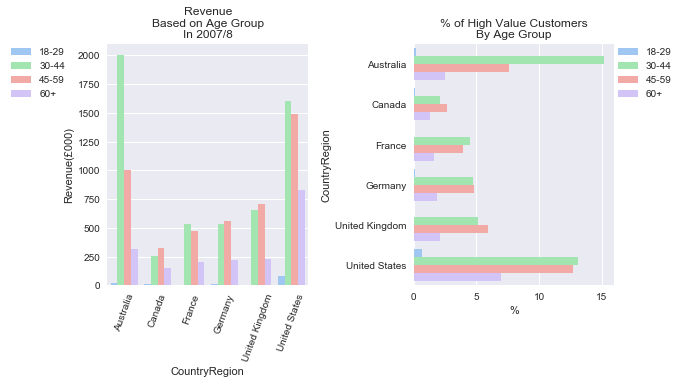

In [75]:
# First plot
plt.subplot(1,2,1)
# Create a groupby that list the total sum of unit price for each age group for every country region  
hv_age_groupby = (high_cust.groupby(['CountryRegion','Age_Group'])['UnitPrice'].sum())
# Divide by 1,000 to make visualisation easier to read
hv_age_groupby = hv_age_groupby/1000
# Convert variable to an integer
hv_age_groupby = hv_age_groupby.astype(int)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion' 
# and a y axis of 'UnitPrice' in the order of the 4 age groups
ax = hv_age_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='UnitPrice', palette='pastel', hue='Age_Group')
plt.xticks(rotation=70)
plt.xlabel('CountryRegion')
plt.ylabel('Revenue(£000)')
plt.title('Revenue' + '\n' + 'Based on Age Group' + '\n' + 'In 2007/8')
# To locate and position the legend box  
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(-0.5,1), loc=2, borderaxespad=0.)

# Second plot
plt.subplot(1,2,2)
# Create a groupby that counts the number of customers for each age group for every country region  
groupby_age = (high_cust.groupby(['CountryRegion','Age_Group'])['CustomerKey'].count())
# Sum the total number of customers as a denominator  
total_age = groupby_age.sum()
# Divide each age group by the denominator and times by 100 to create a percentage and round it by one decimal place
age = round(groupby_age/total_age*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CustomerKey'
# and a y axis of 'UnitPrice' in the order of the 4 age groups
ax = age.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='CustomerKey', palette='pastel', hue='Age_Group')
plt.xlabel('%')
plt.ylabel('CountryRegion')
plt.title('% of High Value Customers' + '\n' + 'By Age Group')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

plt.tight_layout()    
plt.show()  

According to the plots, customers aged 30-44 from Australia are the first largest in terms of revenue accounting to £2m followed by United States being the second largest (£1.6m). However, customers aged 18-29 are the lowest (less than 1%) in all country regions. This means Kernal Ltd should aim to promote their products towards young people.  

## Analysis #2

### High Value Customers By Income 

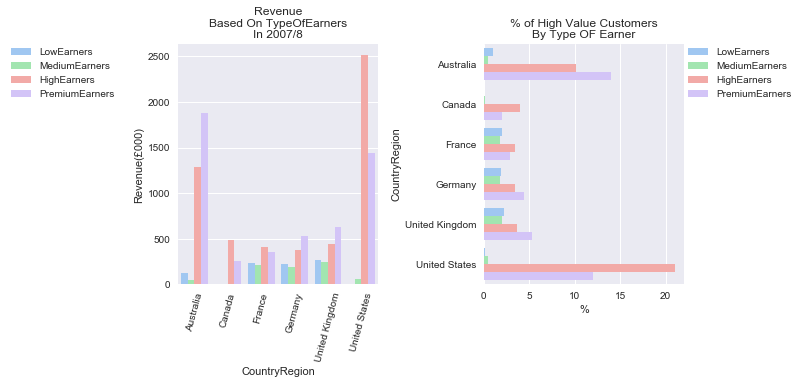

In [76]:
# First plot
plt.subplot(1,2,1)
# Create a groupby that list the total sum of unit price for each TypeOfEarner for every country region 
hv_earner_groupby = (high_cust.groupby(['CountryRegion','TypeOfEarner'])['UnitPrice'].sum())
# Divide by 1,000 to make visualisation easier to read
hv_earner_groupby = hv_earner_groupby/1000
# Convert variable to an integer
hv_earner_groupby = hv_earner_groupby.astype(int)

# Create a hue order of 4 different types of earners 
hue_order  = ['LowEarners','MediumEarners','HighEarners','PremiumEarners']

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion' 
# and a y axis of 'UnitPrice' in the order of the 4 TypeOfEarner groups
ax = hv_earner_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='UnitPrice', palette='pastel', hue='TypeOfEarner', hue_order=hue_order)
plt.xticks(rotation=75)
plt.xlabel('CountryRegion')
plt.ylabel('Revenue(£000)')
plt.title('Revenue'+ '\n' + 'Based On TypeOfEarners' + '\n' +'In 2007/8')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(-0.85,1), loc=2, borderaxespad=0.)

# Second plot
plt.subplot(1,2,2)
# Create a groupby that counts the number of customers for each TypeOfEarner group for every country region  
groupby_earner = (high_cust.groupby(['CountryRegion','TypeOfEarner'])['CustomerKey'].count())
# Sum the total number of customers as a denominator  
total_earner = groupby_earner.sum()
# Divide each TypeOfEarner group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place
hv_earner = round(groupby_earner/total_earner*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CustomerKey'
# and a y axis of 'CountryRegion' in the order of the 4 TypeOfEarner groups
ax = hv_earner.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='CustomerKey', palette='pastel', hue='TypeOfEarner', hue_order=hue_order)
plt.xlabel('%')
plt.ylabel('CountryRegion')
plt.title('% of High Value Customers' + '\n' + 'By Type OF Earner') 
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.show()

It can be seen that Low and Medium Earners are the least in terms of revenue and account for less than 3% in every country region. Whereas in Australia, High Earners account for 10% (£1.28m) in revenue and 14% for Premium Earners (£1.88m). Moreover, in United States, High Earners account for 12% (£2.5m) and interestingly Premium earners account for over 20% (£1.438m) which makes it the first largest in terms of revenue. This signifies that customers who shops at Kernal Ltd are mainly High and Premium Earners.    

## Analysis #3

### High Value Customers By Occupation

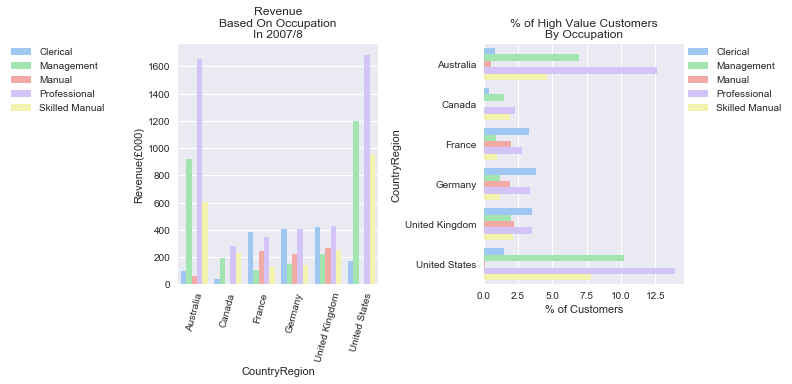

In [77]:
# First plot
plt.subplot(1,2,1)
# Create a groupby that list the total sum of unit price for each TypeOfEarner for every country region
hv_occ_groupby = (high_cust.groupby(['CountryRegion','Occupation'])['UnitPrice'].sum())
# Divide by 1,000 to make visualisation easier to read
hv_occ_groupby = hv_occ_groupby/1000
# Convert variable to an integer
hv_occ_groupby = hv_occ_groupby.astype(int)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion' 
# and a y axis of 'UnitPrice' in the order of the 4 Occupational groups
ax = hv_occ_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='UnitPrice', palette='pastel', hue='Occupation')
plt.xticks(rotation=75)
plt.xlabel('CountryRegion')
plt.ylabel('Revenue(£000)')
plt.title('Revenue'+ '\n' + 'Based On Occupation' + '\n' +'In 2007/8')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(-0.85,1), loc=2, borderaxespad=0.)

# Second plot
plt.subplot(1,2,2)
# Create a groupby that counts the number of customers for each occupation group for every country region  
groupby_occ = high_cust.groupby(['CountryRegion','Occupation'])['CustomerKey'].count()
# Sum the total number of customers as a denominator  
total_occ = groupby_occ.sum()
# Divide each TypeOfEarner group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place
occ = round(groupby_occ/total_occ*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CustomerKey'
# and a y axis of 'CountryRegion' in the order of the 4 Occupational groups
ax = occ.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='CustomerKey', palette='pastel', hue='Occupation')
plt.xlabel('% of Customers')
plt.ylabel('CountryRegion')
plt.title('% of High Value Customers' + '\n' + 'By Occupation')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:], labels[0:], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.show()


It can be seen that customers who work as Professionals are the first largest in revenue in all countries with Management customers being the second largest. Professional customers account for £1.6m each in Australia and United States and account for over 12.5% in both countries. 

Manual customers are the least in revenue with less than 3% in every country. Additionally Manual customers in Canada are the first lowest with £4k in revenue.  

## Analysis #4

### What They Buy By Product Category 

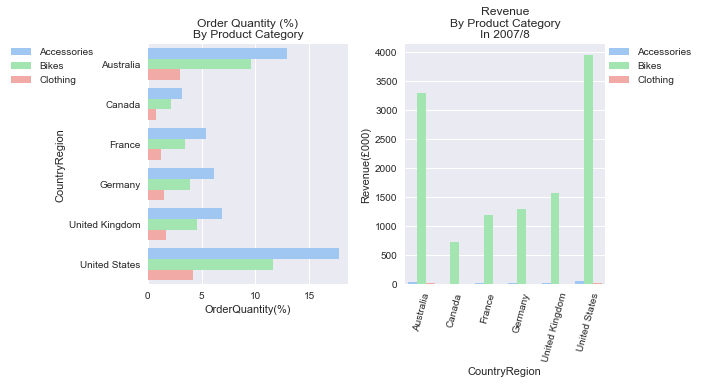

In [78]:
# What They Buy by Product Category
# First plot
plt.subplot(1,2,1)
# Create a groupby that list the total number of Order Quantity for each Product Category for every country region 
groupby_product = high_cust.groupby(['CountryRegion','ProductCategory'])['OrderQuantity'].sum()
# Sum the total number of Order Quantity as a denominator 
total_product = groupby_product.sum()
# Divide each Product Category group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place
product = round(groupby_product/total_product*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'OrderQuantity'
# and a y axis of 'CountryRegion' in the order of the Product Category groups
ax = product.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='OrderQuantity', palette='pastel', hue='ProductCategory')
plt.xlabel('OrderQuantity(%)')
plt.ylabel('CountryRegion')
plt.title('Order Quantity (%)' + '\n' + 'By Product Category')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(-0.7,1), loc=2, borderaxespad=0.)

# Second plot
plt.subplot(1,2,2)
# Create a groupby that list the total sum of unit price for each Product Category for every country region 
hv_product_groupby = high_cust.groupby(['CountryRegion','ProductCategory'])['UnitPrice'].sum()
# Divide by 1,000 to make visualisation easier to read
hv_product_groupby = hv_product_groupby/1000
# Convert variable to an integer
hv_product_groupby = hv_product_groupby.astype(int)
# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion' 
# and a y axis of 'UnitPrice' in the order of the three Product Categories
ax = hv_product_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='UnitPrice', palette='pastel', hue='ProductCategory')
plt.xticks(rotation=75)
plt.ylabel('Revenue(£000)')
plt.title('Revenue'+'\n' + 'By Product Category' + '\n' +'In 2007/8')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

Here we can see that Accessories are the largest in terms of order quantity. A vast majority of the products are sold in Australia and United States. Clothing are the lowest in order quantity out of the 3 product categories.
Another surprising fact is that Bikes are the largest in revenue surpassing Accessories and Clothing greatly.

## Analysis #5

### What Type of Bikes They Buy 

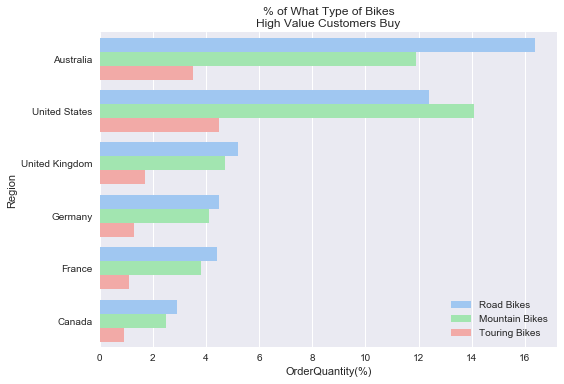

In [79]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over and showing only the 
# Product Category of Bikes
high_cust_bike = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['ProductCategory']=='Bikes')]
# Create a groupby that list the total number of Order Quantity for the Product SubCategory of Bikes for every country region 
groupby_product = high_cust_bike.groupby(['CountryRegion','ProductSubcategory'])['OrderQuantity'].sum()
# Sum the total number of Order Quantity as a denominator 
total_product = groupby_product.sum()
# Divide the Product SubCategory of Bikes by the denominator and times by 100 to create a percentage. 
# Then round it by one decimal place and sort it in ascending order
product = round(groupby_product/total_product*100,1).sort_values(ascending=False)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'OrderQuantity'
# and a y axis of 'CountryRegion' and displaying the order of the Product SubCategories by Bikes
ax = product.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='OrderQuantity', palette='pastel', hue='ProductSubcategory')
plt.ylabel('Region')
plt.xlabel('OrderQuantity(%)')
plt.title('% of What Type of Bikes' + '\n' + 'High Value Customers Buy')
# To locate and position the legend box 
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

We can see that Road Bikes are the most commonly purchased in most countries. Yet Mountain Bikes are slightly more popular in United States while Touring Bikes are the least common in all countries. 

## Analysis #6

### What Type of Accessories They Buy 

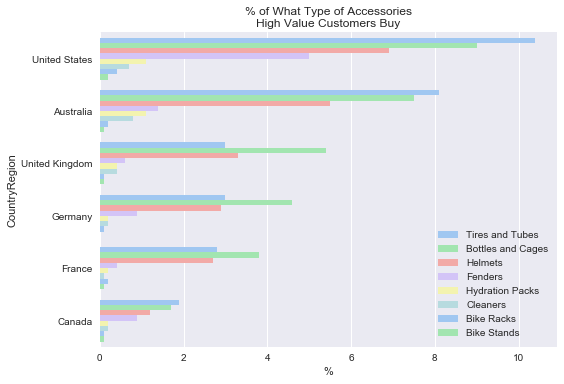

In [80]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over and showing only the 
# Product Category of Accessories
high_cust_access = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['ProductCategory']=='Accessories')]
# Create a groupby that list the total number of Order Quantity for the Product SubCategory of Accessories for every country region 
groupby_product = high_cust_access.groupby(['CountryRegion','ProductSubcategory'])['OrderQuantity'].sum()
# Sum the total number of Order Quantity as a denominator 
total_product = groupby_product.sum()
# Divide the Product SubCategory of Accessories by the denominator and times by 100 to create a percentage. 
# Then round it by one decimal place and sort it in ascending order
product = round(groupby_product/total_product*100,1).sort_values(ascending=False)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'OrderQuantity'
# and a y axis of 'CountryRegion' and displaying the order of the Product SubCategories by Accessories 
ax = product.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='OrderQuantity', palette='pastel', hue='ProductSubcategory')
plt.ylabel('CountryRegion')
plt.xlabel('%')
plt.title('% of What Type of Accessories' + '\n' + 'High Value Customers Buy')
# To locate and position the legend box 
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


According to this plot, we can determine that Tires and Tubes are the most popular in United States, Australia and Canada. However, in United Kingdom, Germany and France customers tend to shop for Bottles and Cages.
Bike Racks and Stands are the least in demand (less than 1% in every country). 

## Analysis #7

### What Type of Clothings They Buy 

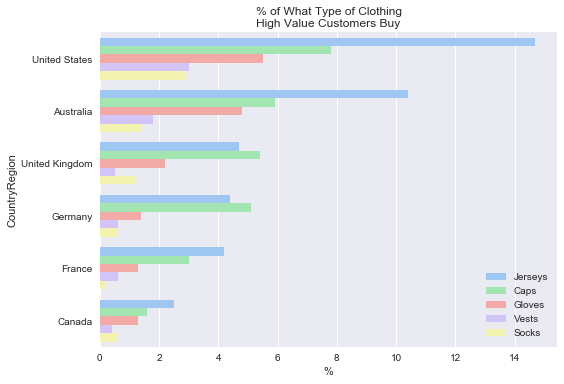

In [81]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over and showing only the 
# Product Category of Clothings
high_cust_cloth = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['ProductCategory']=='Clothing')]
# Create a groupby that list the total number of Order Quantity for the Product SubCategory of Clothings for every country region 
groupby_product = high_cust_cloth.groupby(['CountryRegion','ProductSubcategory'])['OrderQuantity'].sum()
# Sum the total number of Order Quantity as a denominator 
total_product = groupby_product.sum()
# Divide the Product SubCategory of Clothings by the denominator and times by 100 to create a percentage. 
# Then round it by one decimal place and sort it in ascending order
product = round(groupby_product/total_product*100,1).sort_values(ascending=False)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'OrderQuantity'
# and a y axis of 'CountryRegion' and displaying the order of the Product SubCategories by Clothings 
ax = product.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='OrderQuantity', palette='pastel', hue='ProductSubcategory')
plt.ylabel('CountryRegion')
plt.xlabel('%')
plt.title('% of What Type of Clothing' + '\n' + 'High Value Customers Buy')
# To locate and position the legend box 
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()



From this plot, a majority of customers purchase Jerseys in United States, Australia, France and Canada. Whereby a majority of customers in United Kingdom and Germany purchase Caps.  

## Analysis #8

### When They Buy During The Year By Order Quantity

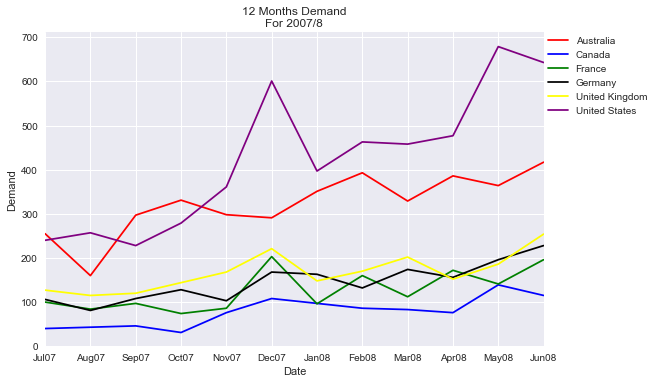

In [82]:
ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
ticks2 = ['Jul07','Aug07','Sep07','Oct07','Nov07','Dec07','Jan08','Feb08','Mar08','Apr08','May08','Jun08']

# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing only Australia
high_cust_aus = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['CountryRegion']=='Australia')]
# Set the index to 'OrderDate'
high_cust_aus = high_cust_aus.set_index('OrderDate')
# Filter and set the period from July 2007 until June 2008 (the latest data) 
high_cust_aus = high_cust_aus.loc['2007-07':'2008-06']
# Create a groupby to show the sum of order quantity based on the year and month for Australia
aus = high_cust_aus.groupby(['Year','Month'])['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in red and label as 'Australia'
ax = aus.plot(color='red',label='Australia')  

# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing only Canada
high_cust_ca = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['CountryRegion']=='Canada')]
# Set the index to 'OrderDate'
high_cust_ca = high_cust_ca.set_index('OrderDate')
# Filter and set the period from July 2007 until June 2008 (the latest data) 
high_cust_ca = high_cust_ca.loc['2007-07':'2008-06']
# Create a groupby to show the sum of order quantity based on the year and month for Canada
ca = high_cust_ca.groupby(['Year','Month'])['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in blue and label as 'Canada'
ax = ca.plot(color='blue',label='Canada') 

# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing only France
high_cust_fr = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['CountryRegion']=='France')]
# Set the index to 'OrderDate'
high_cust_fr = high_cust_fr.set_index('OrderDate')
# Filter and set the period from July 2007 until June 2008 (the latest data) 
high_cust_fr = high_cust_fr.loc['2007-07':'2008-06']
# Create a groupby to show the sum of order quantity based on the year and month for France
fr = high_cust_fr.groupby(['Year','Month'])['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in green and label as 'France'
ax = fr.plot(color='green',label='France') 

# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing only Germany
high_cust_ger = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['CountryRegion']=='Germany')]
# Set the index to 'OrderDate'
high_cust_ger = high_cust_ger.set_index('OrderDate')
# Filter and set the period from July 2007 until June 2008 (the latest data) 
high_cust_ger = high_cust_ger.loc['2007-07':'2008-06']
# Create a groupby to show the sum of order quantity based on the year and month for Germany
ger = high_cust_ger.groupby(['Year','Month'])['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in black and label as 'Germany'
ax = ger.plot(color='k',label='Germany') 

# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing only United Kingdom
high_cust_uk = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['CountryRegion']=='United Kingdom')]
# Set the index to 'OrderDate'
high_cust_uk = high_cust_uk.set_index('OrderDate')
# Filter and set the period from July 2007 until June 2008 (the latest data) 
high_cust_uk = high_cust_uk.loc['2007-07':'2008-06']
# Create a groupby to show the sum of order quantity based on the year and month for United Kingdom
uk = high_cust_uk.groupby(['Year','Month'])['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in yellow and label as 'United Kingdom'
ax = uk.plot(color='yellow',label='United Kingdom') 

# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing only United States
high_cust_us = master_df_clean[(master_df_clean['High_Value_Flag']==1) & (master_df_clean['CountryRegion']=='United States')]
# Set the index to 'OrderDate'
high_cust_us = high_cust_us.set_index('OrderDate')
# Filter and set the period from July 2007 until June 2008 (the latest data) 
high_cust_us = high_cust_us.loc['2007-07':'2008-06']
# Create a groupby to show the sum of order quantity based on the year and month for United States
us = high_cust_us.groupby(['Year','Month'])['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in purple and label as 'United States'
ax = us.plot(color='purple',label='United States') 

plt.ylabel('Demand')
plt.xlabel('Date')
plt.xticks(ticks, ticks2)
plt.title('12 Months Demand' + '\n' + 'For 2007/8')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6], labels[0:6], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

December continues to be the busiest period in most countries while sales drop in Australia even though it is the most festive season. Sales are low in Summer especially in August in all countries.      

## Analysis #9

### When They Buy During The Year By Revenue 

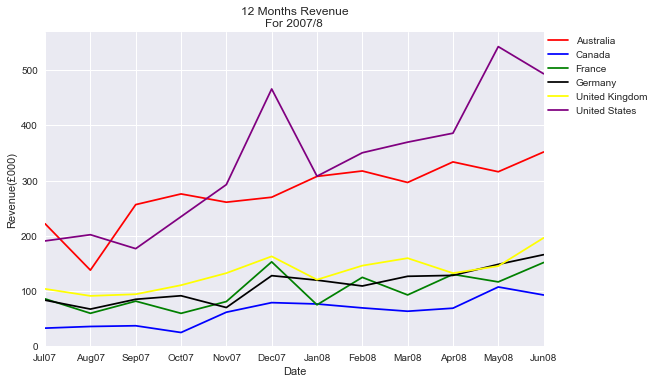

In [83]:
ticks = [0,1,2,3,4,5,6,7,8,9,10,11]
ticks2 = ['Jul07','Aug07','Sep07','Oct07','Nov07','Dec07','Jan08','Feb08','Mar08','Apr08','May08','Jun08']

# Create a groupby to show the total sum of Unit Price by Year and Month for Australia and then divide by 1,000 
# to make visualisation easier to read 
aus = high_cust_aus.groupby(['Year','Month'])['UnitPrice'].sum()/1000
# Sort the index by OrderDate 
aus= aus.sort_index()
# Plot the groupby and colour the ax in red and label as 'Australia' 
ax = aus.plot(color='red',label='Australia')  

# Create a groupby to show the total sum of Unit Price by Year and Month for Canada and then divide by 1,000 
# to make visualisation easier to read 
ca = high_cust_ca.groupby(['Year','Month'])['UnitPrice'].sum()/1000
# Sort the index by OrderDate 
ca = ca.sort_index()
# Plot the groupby and colour the ax in blue and label as 'Canada' 
ax = ca.plot(color='blue',label='Canada') 

# Create a groupby to show the total sum of Unit Price by Year and Month for France and then divide by 1,000 
# to make visualisation easier to read 
fr = high_cust_fr.groupby(['Year','Month'])['UnitPrice'].sum()/1000
# Sort the index by OrderDate 
fr = fr.sort_index()
# Plot the groupby and colour the ax in green and label as 'France' 
ax = fr.plot(color='green',label='France') 

# Create a groupby to show the total sum of Unit Price by Year and Month for Germany and then divide by 1,000 
# to make visualisation easier to read 
ger = high_cust_ger.groupby(['Year','Month'])['UnitPrice'].sum()/1000
# Sort the index by OrderDate 
ger = ger.sort_index()
# Plot the groupby and colour the ax in black and label as 'Germany' 
ax = ger.plot(color='k',label='Germany') 

# Create a groupby to show the total sum of Unit Price by Year and Month for United Kingdom and then divide by 1,000 
# to make visualisation easier to read 
uk = high_cust_uk.groupby(['Year','Month'])['UnitPrice'].sum()/1000
# Sort the index by OrderDate 
uk = uk.sort_index()
# Plot the groupby and colour the ax in yellow and label as 'United Kingdom' 
ax = uk.plot(color='yellow',label='United Kingdom') 

# Create a groupby to show the total sum of Unit Price by Year and Month for United Kingdom and then divide by 1,000 
# to make visualisation easier to read 
us = high_cust_us.groupby(['Year','Month'])['UnitPrice'].sum()/1000
# Sort the index by OrderDate 
us = us.sort_index()
# Plot the groupby and colour the ax in purple and label as 'United States' 
ax = us.plot(color='purple',label='United States') 


plt.ylabel('Revenue(£000)')
plt.xlabel('Date')
plt.xticks(ticks, ticks2)
plt.title('12 Months Revenue' + '\n' + 'For 2007/8')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6], labels[0:6], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

Simiiar to the previous chart, December remains to be the most profitable but plummets in Australia. Again sales are the lowest in Summer.

## Analysis #10

### When They Buy During The Week

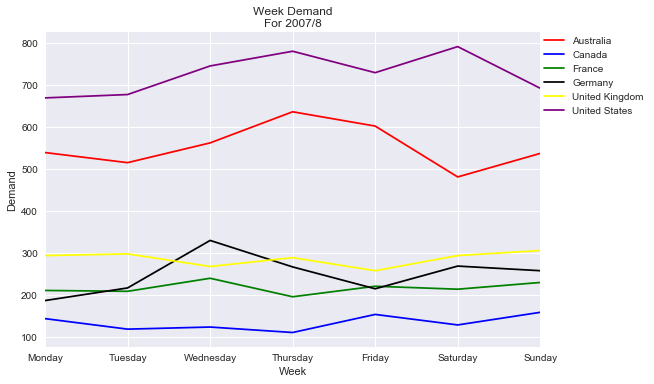

In [84]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# Create a groupby to show the sum of order quantity based on weekday for Australia
aus = high_cust_aus.groupby('Weekday')['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in red and label as 'Australia'
ax = aus.loc[day_order].plot(color='red',label='Australia')  

# Create a groupby to show the sum of order quantity based on weekday for Canada
ca = high_cust_ca.groupby('Weekday')['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in blue and label as 'Canada'
ax = ca.loc[day_order].plot(color='blue',label='Canada') 

# Create a groupby to show the sum of order quantity based on weekday for France
fr = high_cust_fr.groupby('Weekday')['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in green and label as 'France'
ax = fr.loc[day_order].plot(color='green',label='France') 

# Create a groupby to show the sum of order quantity based on weekday for Germany
ger = high_cust_ger.groupby('Weekday')['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in black and label as 'Germany'
ax = ger.loc[day_order].plot(color='k',label='Germany') 

# Create a groupby to show the sum of order quantity based on weekday for United Kingdom
uk = high_cust_uk.groupby('Weekday')['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in yellow and label as 'United Kingdom'
ax = uk.loc[day_order].plot(color='yellow',label='United Kingdom') 

# Create a groupby to show the sum of order quantity based on weekday for United States
us = high_cust_us.groupby('Weekday')['OrderQuantity'].sum().sort_index()
# Plot the groupby and colour the ax in purple and label as 'United States'
ax = us.loc[day_order].plot(color='purple',label='United States') 

plt.ylabel('Demand')
plt.xlabel('Week')
plt.title('Week Demand' + '\n' 'For 2007/8')
# To locate and position the legend box
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:6], labels[0:6], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

Overall, the weekends are recorded to be the busiest time during the week in most countries, while not so busy in Australia. Tuesdays and Fridays have been the least busiest, but not the case in Canada. 

## Analysis #11

### Why They Buy - Commute Distance

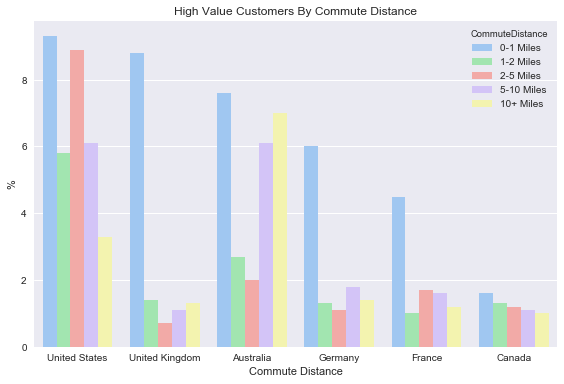

In [85]:
# Create a hue order of 4 different types of commute distance
hue_order = ['0-1 Miles','1-2 Miles','2-5 Miles','5-10 Miles','10+ Miles']

# Create a groupby that counts the number of customers for each type of commute distance group for every country region  
groupby_commute = high_cust.groupby(['CountryRegion','CommuteDistance'])['CustomerKey'].count()
# Sum the total number of customers as a denominator 
total_commute = groupby_commute.sum()
# Divide each commute distance group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place sorted in ascending order
product = round(groupby_commute/total_commute*100,1).sort_values(ascending=False)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion'
# and a y axis of 'CustomerKey' in the order of the commute distance groups
product.reset_index().pipe((sns.barplot, 'data'),
x='CountryRegion', y='CustomerKey', palette='pastel', hue='CommuteDistance', hue_order=hue_order)
plt.title('High Value Customers By Commute Distance')
plt.ylabel('%')
plt.xlabel('Commute Distance')
plt.tight_layout()

plt.show()



A majority of customers travel short distances making the commute distance of 0-1 miles the first largest. Interestingly, in Australia many customers travel 5-10 miles and 10+ miles.    

## Analysis #12

### Why They Buy - Number Of Children

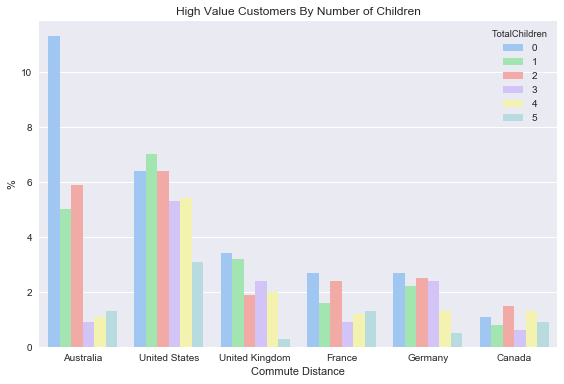

In [86]:
# Create a groupby that counts the number of customers for each category of the number of children group for every country region 
groupby_kids = high_cust.groupby(['CountryRegion','TotalChildren'])['CustomerKey'].count()
# Sum the total number of customers as a denominator 
total_kids = groupby_kids.sum()
# Divide each group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place sorted in ascending order
kids = round(groupby_kids/total_kids*100,1).sort_values(ascending=False)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion'
# and a y axis of 'CustomerKey' in the order of the Total Children groups
kids.reset_index().pipe((sns.barplot, 'data'),
x='CountryRegion', y='CustomerKey', palette='pastel', hue='TotalChildren')
plt.title('High Value Customers By Number of Children')
plt.ylabel('%')
plt.xlabel('Commute Distance')
plt.tight_layout()

plt.show()

Customers generally have more than one child in every coutnry region. However, in Australia more than 10% of customers do not have children. 

## Customer Profiling

For this section, I will create a customer profile that provides a description and analysis of high value customers based on a set of attributes such as demographic, geographic, psychographic and behavioural characteristics

In [87]:
# Create a variable that shows the total sum of revenue for each customer  
master_df_clean['Total_Revenue'] = master_df_clean.groupby('CustomerKey')['UnitPrice'].transform('sum')

In [88]:
# Create a variable that shows the total sum of cost for each customer  
master_df_clean['Total_Cost'] = master_df_clean.groupby('CustomerKey')['TotalProductCost'].transform('sum')

In [89]:
# Create a variable that shows the total profit for each customer  
master_df_clean['Total_Profit'] = master_df_clean.groupby('CustomerKey')['Profit'].transform('sum')

In [90]:
# Create a variable that shows the total sum of order quantity for each customer  
master_df_clean['Frequency'] = master_df_clean.groupby('CustomerKey')['SalesOrderNumber'].transform('count')

In [91]:
# Create a variable that shows the total account length of time for each customer  
master_df_clean['Tenure'] = master_df_clean.groupby('CustomerKey')['Tenure(Days)'].transform('max')

In [92]:
# Create a variable that only contains high value customers 
high_cust_pro = master_df_clean[master_df_clean['High_Value_Flag']==1]

In [93]:
# Create a variable to show customers' profile 
cust_pro = high_cust_pro.loc[:,['CustomerKey','Age','Age_Group','MaritalStatus','Gender','Status_Gender','YearlyIncome','TypeOfEarner','TotalChildren',
                'Education','Occupation','HouseOwnerFlag','NumberCarsOwned','CommuteDistance',
                 'Tenure','Frequency','Total_Revenue','Total_Cost','Total_Profit']]

In [94]:
cust_pro = cust_pro.drop_duplicates(subset='CustomerKey',keep='last')

In [95]:
# Showing the 5 random samples 
cust_pro.sample(5)

,CustomerKey,Age,Age_Group,MaritalStatus,Gender,Status_Gender,YearlyIncome,TypeOfEarner,TotalChildren,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Tenure,Frequency,Total_Revenue,Total_Cost,Total_Profit
41846,22173,54.5,45-59,NaN,NaN,MarriedFemale,30000,MediumEarners,3,High School,Skilled Manual,0,2,1-2 Miles,393 days,4,2735.53,1669.56,1065.97
8376,12381,33.7,30-44,NaN,NaN,MarriedMale,40000,HighEarners,1,Bachelors,Skilled Manual,1,0,1-2 Miles,303 days,6,5161.73,2858.21,2303.52
9279,12630,53.1,45-59,NaN,NaN,MarriedMale,80000,PremiumEarners,4,Partial College,Professional,1,1,10+ Miles,260 days,6,6825.46,3879.83,2945.63
24626,16452,28.8,18-29,NaN,NaN,SingleFemale,30000,MediumEarners,0,Partial College,Clerical,0,1,0-1 Miles,614 days,6,3071.01,1805.13,1265.88
51316,25737,48.0,45-59,NaN,NaN,MarriedMale,40000,HighEarners,3,Graduate Degree,Clerical,1,0,0-1 Miles,0 days,4,1764.96,1106.44,658.52


## New Treatment Group: Prospective Buyers 

I will now compare the existing customers to a new treatment group of prospective buyers in order to find out if Kernal Ltd have been targeting at the right customers and look for ways to approach and communicate to this particular group as a benchmark.

In [96]:
# Import and read csv file into a dataframe that contains Prospective buyers' information
prospective = pd.read_csv('dbo_prospectivebuyer.csv',index_col=0)

In [97]:
# Convert the variable to date format
prospective['BirthDate'] = pd.to_timedelta(prospective['BirthDate'], unit='s') + pd.datetime(1960, 1, 1)

In [98]:
# Clean the email address variable by removing the letter that begins with 'a' 
prospective['EmailAddress'] = prospective['EmailAddress'].str[1:]

In [99]:
# Create a variable that calculates the number of days between the lastest date and birthdate 
prospective['Diff_In_Days'] = datetime(2008,7,31) - prospective['BirthDate']
# Turn the above variable into years instead of days thereby creating a new variable 'Age' of each Customer
prospective['Age'] = prospective['Diff_In_Days'] / timedelta(days=365)
# Round the variable to one decimal point
prospective['Age'] = round(prospective['Age'],1)

In [100]:
# Apply the Age_Group function to age variable
prospective['Age_Group'] = prospective.apply(age_group, axis=1)

In [101]:
# Apply the TypeOfEarner function to the income variable
prospective['TypeOfEarner'] = prospective.apply(income, axis=1)

In [102]:
# Show the first 5 rows of the dataset
prospective.head()

,ProspectiveBuyerKey,ProspectAlternateKey,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,YearlyIncome,...,City,StateProvinceCode,PostalCode,Phone,Salutation,Unknown,Diff_In_Days,Age,Age_Group,TypeOfEarner
0,1.0,21596444800,Adam,NaN,Alexander,1940-07-02,M,M,alexander@lucernepublishing.com,40000.0,...,Cedar City,UT,84720,516-555-0187,Mr.,0.0,24866 days,68.1,60+,HighEarners
1,2.0,3003,Adrienne,NaN,Alonso,1944-09-06,M,F,alonso@alpineskihouse.com,80000.0,...,Colma,CA,94014,607-555-0119,Ms.,4.0,23339 days,63.9,60+,PremiumEarners
2,3.0,1077,Alfredo,B,Alvarez,1958-10-01,S,M,alvarez@fineartschool.net,130000.0,...,Lynnwood,WA,98036,1 (11) 500 555-0143,Mr.,1.0,18201 days,49.9,45-59,PremiumEarners
3,4.0,4779,Arthur,A,Arun,1979-09-23,S,M,arun@adventure-works.com,50000.0,...,Chula Vista,CA,91910,403-555-0186,Mr.,4.0,10539 days,28.9,18-29,HighEarners
4,5.0,38032399400,Andrea,M,Bailey,1959-10-28,M,F,bailey@lucernepublishing.com,10000.0,...,Dallas,TX,75201,1 (11) 500 555-0113,Ms.,4.0,17809 days,48.8,45-59,LowEarners


In [103]:
# Use a for loop to convert the following variables to integers 
for col in [
    'ProspectiveBuyerKey','YearlyIncome','TotalChildren','NumberCarsOwned'
]:
    prospective[col] = prospective[col].astype(int)

In [104]:
# Create a customer profile for prospective buyers
prospective.loc[:,['ProspectiveBuyerKey','Age','Age_Group','YearlyIncome','TypeOfEarner','MaritalStatus','Gender',
                              'TotalChildren','Education','Occupation','NumberCarsOwned']].sample(5)

,ProspectiveBuyerKey,Age,Age_Group,YearlyIncome,TypeOfEarner,MaritalStatus,Gender,TotalChildren,Education,Occupation,NumberCarsOwned
979,980,35.7,30-44,110000,PremiumEarners,M,F,1,Graduate D,Management,3
345,346,35.3,30-44,90000,PremiumEarners,S,M,2,Bachelors,Professional,0
1706,1707,43.5,30-44,50000,HighEarners,M,M,1,Partial Co,Skilled Manual,1
106,107,31.3,30-44,80000,PremiumEarners,M,F,0,High Schoo,Management,3
469,470,39.4,30-44,20000,LowEarners,M,M,2,High Schoo,Manual,1


In [105]:
# Our own Customer profile
cust_pro.sample(5)

,CustomerKey,Age,Age_Group,MaritalStatus,Gender,Status_Gender,YearlyIncome,TypeOfEarner,TotalChildren,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Tenure,Frequency,Total_Revenue,Total_Cost,Total_Profit
2308,11289,46.4,45-59,NaN,NaN,MarriedFemale,130000,PremiumEarners,1,Bachelors,Management,1,1,0-1 Miles,496 days,5,5905.48,3435.32,2470.16
47421,24242,61.1,60+,NaN,NaN,MarriedFemale,30000,MediumEarners,2,Partial College,Clerical,0,2,1-2 Miles,324 days,3,2756.54,1677.42,1079.12
20567,15374,73.4,60+,NaN,NaN,MarriedFemale,70000,HighEarners,4,Graduate Degree,Management,1,2,5-10 Miles,470 days,5,3177.96,1780.38,1397.58
35982,20075,53.1,45-59,NaN,NaN,SingleMale,10000,LowEarners,2,High School,Manual,1,2,1-2 Miles,0 days,1,3399.99,1912.15,1487.84
50468,25408,38.2,30-44,NaN,NaN,MarriedFemale,70000,HighEarners,2,Bachelors,Skilled Manual,1,1,2-5 Miles,479 days,4,2735.53,1669.56,1065.97


## Data Analysis and Visualisation to Compare Two Groups

The next task is to use data visualisations to compare the two groups together  

## Analysis #13

### High Value Customers VS Prospective Buyers By Age Group AND Type Of Earner 

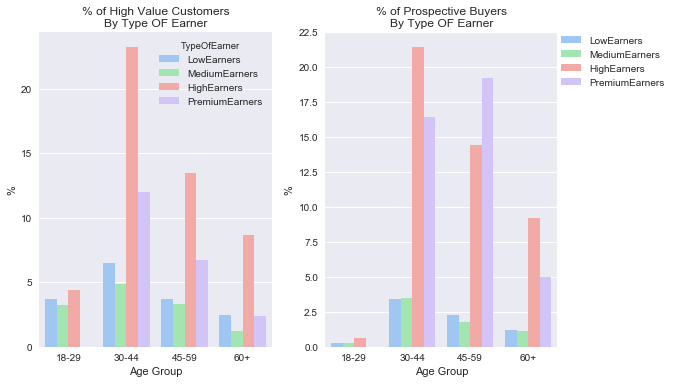

In [106]:
ticks = [0,1,2,3]
hue_order  = ['LowEarners','MediumEarners','HighEarners','PremiumEarners']
ticks2 = ['18-29','30-44','45-59','60+']

# First plot
plt.subplot(1,2,1)
# Create a groupby that counts the number of prospective buyers for each TypeOfEarner group for every age group  
pro_age_earner = prospective.groupby(['Age_Group','TypeOfEarner'])['ProspectiveBuyerKey'].count()
# Sum the total number of prospective buyers as a denominator 
total_age_earner = pro_age_earner.sum()
# Divide each TypeOfEarner and age group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place
age_earner = round(pro_age_earner/total_age_earner*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'Age_Group'
# and a y axis of 'ProspectiveBuyerKey' in the order of the 4 TypeOfEarner groups
ax = age_earner.reset_index().pipe((sns.barplot, 'data'), 
x='Age_Group', y='ProspectiveBuyerKey', palette='pastel', hue='TypeOfEarner', hue_order=hue_order)
plt.xlabel('Age Group')
plt.xticks(ticks, ticks2)
plt.ylabel('%')
plt.title('% of High Value Customers' + '\n' + 'By Type OF Earner') 

# Second plot
plt.subplot(1,2,2)
# Create a groupby that counts the number of customers for each TypeOfEarner for every age group 
pro_age_earner = high_cust.groupby(['Age_Group','TypeOfEarner'])['CustomerKey'].count()
# Sum the total number of customers as a denominator
total_age_earner = pro_age_earner.sum()
# Divide each TypeOfEarner and age group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place
age_earner = round(pro_age_earner/total_age_earner*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'Age_Group'
# and a y axis of 'CustomerKey' in the order of the 4 TypeOfEarner groups
ax = age_earner.reset_index().pipe((sns.barplot, 'data'), 
x='Age_Group', y='CustomerKey', palette='pastel', hue='TypeOfEarner', hue_order=hue_order)
plt.xlabel('Age Group')
plt.xticks(ticks,ticks2)
plt.ylabel('%')
plt.title('% of Prospective Buyers' + '\n' + 'By Type OF Earner') 

# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

We can see that there is a high number of Premium Earners particularly from the age of 30-44(16%) and 45-59(19%) under Prospectives Buyers. However, when comparing to our dataset there is only less than 12% for Premium Earners from the age of 30-44 and less than 7% for 45-59. 

## Analysis #14

### High Value Customers VS Prospective Buyers By Type Of Earner AND Occupation

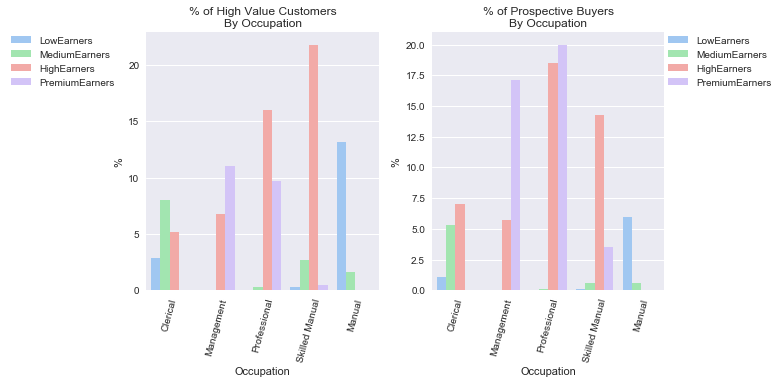

In [107]:
# First plot
plt.subplot(1,2,1)
# Create a groupby that counts the number of prospective buyers for each Occupation group for every TypeOfEarner
pro_age_earner = prospective.groupby(['TypeOfEarner','Occupation'])['ProspectiveBuyerKey'].count()
# Sum the total number of prospective buyers as a denominator  
total_age_earner = pro_age_earner.sum()
# Divide each age group by the denominator and times by 100 to create a percentage and round it by one decimal place
age_earner = round(pro_age_earner/total_age_earner*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'Occupation'
# and a y axis of 'ProspectiveBuyerKe' in the order of the 4 TypeOfEarner groups
ax = age_earner.reset_index().pipe((sns.barplot, 'data'), 
x='Occupation', y='ProspectiveBuyerKey', palette='pastel', hue='TypeOfEarner', hue_order=hue_order)
plt.xlabel('Occupation')
plt.xticks(rotation=75)
plt.ylabel('%')
plt.title('% of High Value Customers' + '\n' + 'By Occupation') 
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(-0.6,1), loc=2, borderaxespad=0.)

# Second plot
plt.subplot(1,2,2)
# Create a groupby that counts the number of customers for each Occupation for every TypeOfEarner group 
pro_age_earner = high_cust.groupby(['TypeOfEarner','Occupation'])['CustomerKey'].count()
# Sum the total number of customers as a denominator 
total_age_earner = pro_age_earner.sum()
# Divide each age group by the denominator and times by 100 to create a percentage and round it by one decimal place
age_earner = round(pro_age_earner/total_age_earner*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'Occupation'
# and a y axis of 'CustomerKey' in the order of the 4 TypeOfEarner groups
ax = age_earner.reset_index().pipe((sns.barplot, 'data'), 
x='Occupation', y='CustomerKey', palette='pastel', hue='TypeOfEarner', hue_order=hue_order)
plt.xlabel('Occupation')
plt.xticks(rotation=75)
plt.ylabel('%')
plt.title('% of Prospective Buyers' + '\n' + 'By Occupation') 
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

It is clear to say that Kernal Limited are not targeting enough to PremiumEarners who work in Management and Professional. According to the plot under Prospective Buyers, there is over 16% of Premium Earners who work in Management and over 17.5% under Professional. As you can see Kernal Ltd only reached to less than 12% of Premium Earners who work in Management and less than 10% under Professional. However, Kernal Ltd is paying more attention to Low Earners under Clerical and Manual as well as HighEarners under Skilled Manual.

## Analysis #15

### High Value Customers VS Prospective Buyers By Age Group AND Total Children

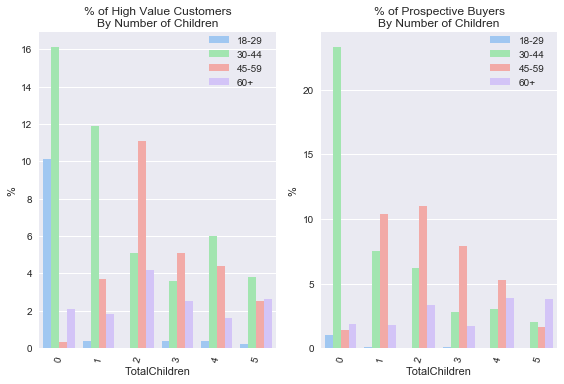

In [108]:
ticks = [0,1,2,3,4,5]
ticks2 = [0,1,2,3,4,5]

# First plot
plt.subplot(1,2,1)
# Create a groupby that counts the number of prospective buyers for each TotalChildren group for every age group
pro_age_earner = prospective.groupby(['Age_Group','TotalChildren'])['ProspectiveBuyerKey'].count()
# Sum the total number of prospective buyers as a denominator 
total_age_earner = pro_age_earner.sum()
# Divide each age group by the denominator and times by 100 to create a percentage and round it by one decimal place
age_earner = round(pro_age_earner/total_age_earner*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'TotalChildren'
# and a y axis of 'ProspectiveBuyerKey' in the order of the 4 Age groups
ax = age_earner.reset_index().pipe((sns.barplot, 'data'), 
x='TotalChildren', y='ProspectiveBuyerKey', palette='pastel', hue='Age_Group')
plt.xlabel('TotalChildren')
plt.xticks(ticks,ticks2,rotation=75)
plt.ylabel('%')
plt.title('% of High Value Customers' + '\n' + 'By Number of Children') 
# To locate and position the legend box
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(0.7,1), loc=2, borderaxespad=0.)

# Second plot
plt.subplot(1,2,2)
# Create a groupby that counts the number of customers for each TotalChildren for every Age group 
pro_age_earner = high_cust.groupby(['Age_Group','TotalChildren'])['CustomerKey'].count()
# Sum the total number of customers as a denominator 
total_age_earner = pro_age_earner.sum()
# Divide each age group by the denominator and times by 100 to create a percentage and round it by one decimal place
age_earner = round(pro_age_earner/total_age_earner*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'TotalChildren'
# and a y axis of 'CustomerKey' in the order of the 4 Age groups
ax = age_earner.reset_index().pipe((sns.barplot, 'data'), 
x='TotalChildren', y='CustomerKey', palette='pastel', hue='Age_Group')
plt.xlabel('TotalChildren')
plt.xticks(rotation=75)
plt.ylabel('%')
plt.title('% of Prospective Buyers' + '\n' + 'By Number of Children') 
# To locate and position the legend box
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(0.7,1), loc=2, borderaxespad=0.)

plt.tight_layout()

plt.show()

Kernal Ltd have over 10% of customers aged 18-29 who do not have children and nearly 12% only have one child aged 30-44, but when you look at Prospective Buyers there is only less than 3% who have no children and 8% who have only one child. 

## Customer Attrition

I will now analyse the impact of the overall analysis on customer attrition. Attrition on this case refers to customers who had in the six(6) months prior been active or in high value category, but now have not shopped twelve months later. 

In [109]:
# Create and only use the last date for analysis as we would like to know if customers have been buying from 
# Kernal Ltd within the last six months
max_trans_date = max(master_df_clean['OrderDate'])
max_trans_date

Timestamp('2008-07-31 00:00:00')

In [110]:
# Name the variable to Max_trans_date 
master_df_clean['Max_trans_date'] = datetime(2008,7,31)
master_df_clean['LastDayOfPurchase'] = master_df_clean['OrderDate']
master_df_clean['Twelve_Months'] = master_df_clean['Max_trans_date'] - timedelta(days=365)

In [111]:
# Define a function to findout whether the customers churn or not 
def churn(date):
    if date['LastDayOfPurchase'] > date['Twelve_Months']:
        return 1
    else:
        0
        
master_df_clean['Churn_Flag'] = master_df_clean.apply(churn, axis=1) 

In [112]:
# Replace NA entries to 0
master_df_clean['Churn_Flag'] = master_df_clean['Churn_Flag'].fillna(0)

In [113]:
# Convert the variable to an integer
master_df_clean['Churn_Flag'] = master_df_clean['Churn_Flag'].astype(int)

In [114]:
# Filter to only show customers who have a total basket value over £1,500
high_cust_attr = master_df_clean[master_df_clean['High_Value_Flag']==1]

In [115]:
# This is the finalised Customer Profile adding the last day of their purchase and findout whether they came back or not
cust_at = high_cust_attr.loc[:,[
    'CustomerKey','Age','Age_Group','Status_Gender','YearlyIncome','TypeOfEarner','TotalChildren',
    'CountryRegion','Education','Occupation','HouseOwnerFlag','NumberCarsOwned',
    'CommuteDistance','Tenure','Frequency','Total_Revenue','LastDayOfPurchase','Twelve_Months','Churn_Flag'
]]

cust_at = cust_at.drop_duplicates(subset='CustomerKey',keep='last')
cust_at.head()

,CustomerKey,Age,Age_Group,Status_Gender,YearlyIncome,TypeOfEarner,TotalChildren,CountryRegion,Education,Occupation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Tenure,Frequency,Total_Revenue,LastDayOfPurchase,Twelve_Months,Churn_Flag
7,11000,41.6,30-44,MarriedMale,90000,PremiumEarners,2,Australia,Bachelors,Professional,1,0,1-2 Miles,835 days,8,8248.99,2007-11-04,2007-08-01,1
14,11001,42.2,30-44,SingleMale,60000,HighEarners,3,Australia,Bachelors,Professional,0,1,0-1 Miles,1060 days,11,6383.88,2007-07-20,2007-08-01,0
22,11002,42.1,30-44,MarriedMale,60000,HighEarners,3,Australia,Bachelors,Professional,1,1,2-5 Miles,778 days,4,8114.04,2007-08-27,2007-08-01,1
31,11003,39.8,30-44,SingleFemale,70000,HighEarners,0,Australia,Bachelors,Professional,0,1,5-10 Miles,863 days,9,8139.29,2007-11-11,2007-08-01,1
37,11004,39.3,30-44,SingleFemale,80000,PremiumEarners,5,Australia,Bachelors,Professional,1,4,1-2 Miles,829 days,6,8196.01,2007-11-02,2007-08-01,1


In [116]:
# This shows the number of customers who have churn or not 
churn = cust_at.groupby('Churn_Flag').size()
churn

Churn_Flag
0    1831
1    4472
dtype: int64

## Data Visualisation on Customer Churn 

## Analysis #16

### High Value Customers By Customer Churn  

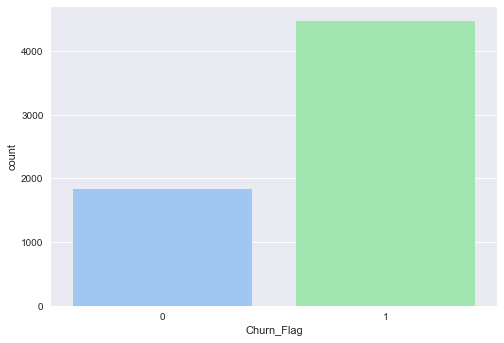

In [117]:
ax = sns.countplot(x='Churn_Flag', data=cust_at, palette='pastel')

Over 4,000 customers churns which may be due to:

- Bad Customer Service 
- Broken Promises 
- No Loyalty
- Pushed too hard
- Unexpected Inconvenience  


## Analysis #17

### Customer Churn By Country Region AND Age Group

In [118]:
# Filter to only show customers with a churn flag
churn_cust_1 = cust_at[cust_at['Churn_Flag']==1]

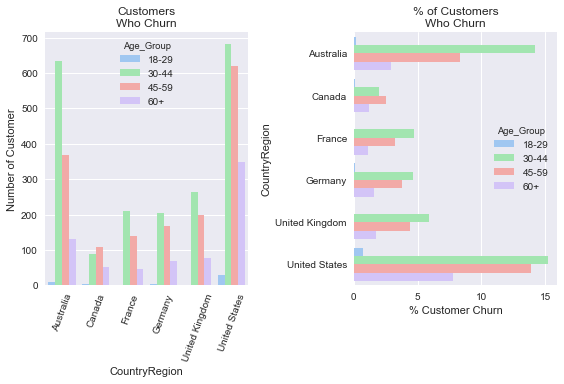

In [119]:
# # Create a groupby that list the total number of customer churns for each age group for every country region  
churn_groupby = (churn_cust_1.groupby(['CountryRegion','Age_Group'])['Churn_Flag'].count())

plt.subplot(1,2,1)
# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'Country' 
# and a y axis of 'UnitPrice' in the order of the 4 age groups
ax = churn_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='Churn_Flag', palette='pastel', hue='Age_Group')
plt.xticks(rotation=70)
plt.xlabel('CountryRegion')
plt.ylabel('Number of Customer')
plt.title('Customers' + '\n' +  'Who Churn')

plt.subplot(1,2,2)
# Sum the total number of customers as a denominator 
total_churn = churn_groupby.sum()
# Divide each age group by the denominator and times by 100 to create a percentage and round it by one decimal place
age_earner = round(churn_groupby/total_churn*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'Churn_Flag'
# and a y axis of 'CountryRegion' in the order of the 4 Age groups
ax = age_earner.reset_index().pipe((sns.barplot, 'data'), 
x='Churn_Flag', y='CountryRegion', palette='pastel', hue='Age_Group')
plt.xlabel('% Customer Churn')

plt.ylabel('CountryRegion')
plt.title('% of Customers' + '\n' + 'Who Churn') 

plt.tight_layout()    
plt.show()

Customers who churn are mainly from the age of 30-44 and 45-59. Australia and United States have the most churns as they are both big countries so the number of customers are high.

## Analysis #18

### Customer Churn By Country Region AND Type Of Earner

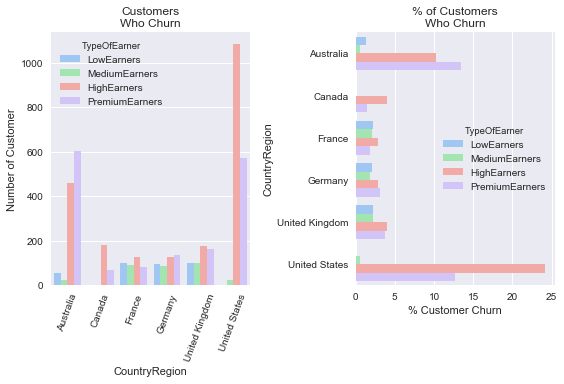

In [120]:
# Create a groupby that list the total number of customer churns for each age group for every country region  
churn_groupby = (churn_cust_1.groupby(['CountryRegion','TypeOfEarner'])['Churn_Flag'].count())
hue_order = ['LowEarners','MediumEarners','HighEarners','PremiumEarners']

plt.subplot(1,2,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion' 
# and a y axis of 'Churn_Flag' in the order of the 4 TypeOfEarner groups
ax = churn_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='Churn_Flag', palette='pastel', hue='TypeOfEarner',hue_order=hue_order)
plt.xticks(rotation=70)
plt.xlabel('CountryRegion')
plt.ylabel('Number of Customer')
plt.title('Customers' + '\n' +  'Who Churn')


plt.subplot(1,2,2)
# Sum the total number of customers as a denominator 
total_churn = churn_groupby.sum()
# Divide each age group by the denominator and times by 100 to create a percentage and round it by one decimal place
type_earner = round(churn_groupby/total_churn*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'Churn_Flag'
# and a y axis of 'CountryRegion' in the order of the 4 Age groups
ax = type_earner.reset_index().pipe((sns.barplot, 'data'), 
x='Churn_Flag', y='CountryRegion', palette='pastel', hue='TypeOfEarner',hue_order=hue_order)
plt.xlabel('% Customer Churn')

plt.ylabel('CountryRegion')
plt.title('% of Customers' + '\n' + 'Who Churn') 
  
plt.tight_layout()    
plt.show()

Most customers who are High Earners and Premium Earners decide to churn especially in the United states and Australia. This is a concern for Kernal Ltd as in my previous analysis HighEarners and PremiumEarners are the main source of income.   

## Market Basket Analysis

I will now analyse the data further and perform market basket analysis to identify relationships between the items that customers buy.

In [121]:
# Import packages to perform market basket analysis
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [122]:
# Here is a sample of what a customer bought in the past
basket_df = high_cust.loc[:,[
    'SalesOrderNumber','SalesTerritoryCountry','ProductCategory',
    'ProductName','OrderQuantity','UnitPrice']]

basket_df.head(2)

,SalesOrderNumber,SalesTerritoryCountry,ProductCategory,ProductName,OrderQuantity,UnitPrice
OrderDate,,,,,,
2007-07-22,SO51522,Australia,Bikes,"Mountain-200 Silver, 38",1,2319.99
2007-07-22,SO51522,Australia,Accessories,Fender Set - Mountain,1,21.98


In [123]:
# This is to simplify the results and ensure that any positive values of order quantity 
# are converted to a 1 and 0. This is because I am only interested in what 
# customers bought together as opposed to how many items bought 

def encode_units(x):
    if x <=0:
        return 0
    if x >= 1:
        return 1

## Australia

In [124]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing the basket only related to Australia
basket_aus = (master_df_clean[(master_df_clean['SalesTerritoryCountry'] == 'Australia') & (master_df_clean['High_Value_Flag']==1)]
          # Create groupby to find the total number of order quantity based on SalesOrderNumber and Product Name
          .groupby(['SalesOrderNumber','ProductName'])['OrderQuantity']
          # Unstack the table so that the data is structured properly, reset the index and then fill the NA entries with 0
          .sum().unstack().reset_index().fillna(0)
          # Set the index to SalesOrderNumber 
          .set_index('SalesOrderNumber'))

In [125]:
# Apply the function that was created to set the results to either 0 or 1
basket_sets = basket_aus.applymap(encode_units)
# Generate frequent item sets that have a support of at least 5% in order to get enough useful examples
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
# Generate the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
# Show results
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Water Bottle - 30 oz.),(Road Bottle Cage),0.089954,0.068943,0.060079,0.667883,9.687487,0.053877,2.803403
1,(Road Bottle Cage),(Water Bottle - 30 oz.),0.068943,0.089954,0.060079,0.871429,9.687487,0.053877,7.078135


In [126]:
# Filter the results and set the lift to 6 or more and confidence to 0.8 or more
rules[ (rules['lift'] >=6) &
       (rules['confidence'] >= 0.8)
     ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Road Bottle Cage),(Water Bottle - 30 oz.),0.068943,0.089954,0.060079,0.871429,9.687487,0.053877,7.078135


Looking at the rules, it can be seen that the Road Bottle Cage and Water Bottle - 30 oz are purchased together. 

I now want to find out how much opportunity there is for selling Road Bottle Cage and improve sales for the Water Bottle.

In [127]:
# When we sell 210 Road Bottle Cages, 274 Water Bottles were sold which drove even 
# more sales and proved to be very effective  
basket_aus['Road Bottle Cage'].sum()

210.0

In [128]:
basket_aus['Water Bottle - 30 oz.'].sum()

274.0

## Canada

In [129]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing the basket only related to Canada
basket_ca = (master_df_clean[(master_df_clean['SalesTerritoryCountry'] == 'Canada') & (master_df_clean['High_Value_Flag']==1)]
          # Create groupby to find the total number of order quantity based on SalesOrderNumber and Product Name
          .groupby(['SalesOrderNumber','ProductName'])['OrderQuantity']
          # Unstack the table so that the data is structured properly, reset the index and then fill the NA entries with 0
          .sum().unstack().reset_index().fillna(0)
          # Set the index to SalesOrderNumber 
          .set_index('SalesOrderNumber'))

In [130]:
# Apply the function that was created to set the results to either 0 or 1
basket_sets = basket_ca.applymap(encode_units)
# Generate frequent item sets that have a support of at least 5% in order to get enough useful examples
frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
# Generate the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
# Show results
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.067323,0.096880,0.050903,0.756098,7.804465,0.044381,3.702791
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.096880,0.067323,0.050903,0.525424,7.804465,0.044381,1.965283


In [131]:
# Filter the results and set the lift to 6 or more and confidence to 0.7 or more
rules[ (rules['lift'] >=6) &
       (rules['confidence'] >= 0.7)
     ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.067323,0.09688,0.050903,0.756098,7.804465,0.044381,3.702791


In [132]:
# When we sell 41 Mountain Bottle Cage, 59 Water Bottles were sold 
basket_ca['Mountain Bottle Cage'].sum()

41.0

In [133]:
basket_ca['Water Bottle - 30 oz.'].sum()

59.0

## France

In [134]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing the basket only related to France
basket_fr = (master_df_clean[(master_df_clean['SalesTerritoryCountry'] == 'France') & (master_df_clean['High_Value_Flag']==1)]
          # Create groupby to find the total number of order quantity based on SalesOrderNumber and Product Name
          .groupby(['SalesOrderNumber','ProductName'])['OrderQuantity']
          # Unstack the table so that the data is structured properly, reset the index and then fill the NA entries with 0
          .sum().unstack().reset_index().fillna(0)
          # Set the index to SalesOrderNumber 
          .set_index('SalesOrderNumber'))

In [135]:
# Apply the function that was created to set the results to either 0 or 1
basket_sets = basket_fr.applymap(encode_units)
# Generate frequent item sets that have a support of at least 6% in order to get enough useful examples
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)
# Generate the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
# Show results
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.111111,0.150393,0.084175,0.757576,5.037313,0.067465,3.504630
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.150393,0.111111,0.084175,0.559701,5.037313,0.067465,2.018832
2,(Water Bottle - 30 oz.),(Road Bottle Cage),0.150393,0.071829,0.066218,0.440299,6.129781,0.055415,1.658331
3,(Road Bottle Cage),(Water Bottle - 30 oz.),0.071829,0.150393,0.066218,0.921875,6.129781,0.055415,10.874972


In [136]:
# Filter the results and set the lift to 6 or more and confidence to 0.7 or more
rules[ (rules['lift'] >=6) &
       (rules['confidence'] >= 0.7)
     ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Road Bottle Cage),(Water Bottle - 30 oz.),0.071829,0.150393,0.066218,0.921875,6.129781,0.055415,10.874972


In [137]:
# When we sell 64 Road Bottle Cage, 134 Water Bottles were sold which sold twice as much  
basket_fr['Road Bottle Cage'].sum()

64.0

In [138]:
basket_fr['Water Bottle - 30 oz.'].sum()

134.0

## Germany 

In [139]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing the basket only related to Germany
basket_ger = (master_df_clean[(master_df_clean['SalesTerritoryCountry'] == 'Germany') & (master_df_clean['High_Value_Flag']==1)]
          # Create groupby to find the total number of order quantity based on SalesOrderNumber and Product Name
          .groupby(['SalesOrderNumber','ProductName'])['OrderQuantity']
          # Unstack the table so that the data is structured properly, reset the index and then fill the NA entries with 0
          .sum().unstack().reset_index().fillna(0)
           # Set the index to SalesOrderNumber 
          .set_index('SalesOrderNumber'))

In [140]:
# Apply the function that was created to set the results to either 0 or 1
basket_sets = basket_ger.applymap(encode_units)
# Generate frequent item sets that have a support of at least 6% in order to get enough useful examples
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)
# Generate the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
# Show results
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.128286,0.175605,0.106204,0.827869,4.714391,0.083676,4.789345
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.175605,0.128286,0.106204,0.604790,4.714391,0.083676,2.205701
2,(Water Bottle - 30 oz.),(Road Bottle Cage),0.175605,0.075710,0.069401,0.395210,5.220060,0.056106,1.528282
3,(Road Bottle Cage),(Water Bottle - 30 oz.),0.075710,0.175605,0.069401,0.916667,5.220060,0.056106,9.892744


In [141]:
# Filter the results and set the lift to 5 or more and confidence to 0.8 or more
rules[ (rules['lift'] >=5) &
       (rules['confidence'] >= 0.8)
     ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Road Bottle Cage),(Water Bottle - 30 oz.),0.07571,0.175605,0.069401,0.916667,5.22006,0.056106,9.892744


In [142]:
# When we sell 72 Road Bottle Cage, 167 Water Bottles were sold 
basket_ger['Road Bottle Cage'].sum()

72.0

In [143]:
basket_ger['Water Bottle - 30 oz.'].sum()

167.0

## United Kingdom

In [144]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing the basket only related to United Kingdom
basket_uk = (master_df_clean[(master_df_clean['SalesTerritoryCountry'] == 'United Kingdom') & (master_df_clean['High_Value_Flag']==1)]
          # Create groupby to find the total number of order quantity based on SalesOrderNumber and Product Name
          .groupby(['SalesOrderNumber','ProductName'])['OrderQuantity']
          # Unstack the table so that the data is structured properly, reset the index and then fill the NA entries with 0
          .sum().unstack().reset_index().fillna(0)
          # Set the index to SalesOrderNumber 
          .set_index('SalesOrderNumber'))

In [145]:
# Apply the function that was created to set the results to either 0 or 1
basket_sets = basket_uk.applymap(encode_units)
# Generate frequent item sets that have a support of at least 6% in order to get enough useful examples
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)
# Generate the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
# Show results
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.116592,0.173991,0.087892,0.753846,4.332672,0.067606,3.355661
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.173991,0.116592,0.087892,0.505155,4.332672,0.067606,1.785220
2,(Water Bottle - 30 oz.),(Road Bottle Cage),0.173991,0.091480,0.086099,0.494845,5.409339,0.070182,1.798499
3,(Road Bottle Cage),(Water Bottle - 30 oz.),0.091480,0.173991,0.086099,0.941176,5.409339,0.070182,14.042152


In [146]:
# Filter the results and set the lift to 4 or more and confidence to 0.8 or more
rules[ (rules['lift'] >=4) &
       (rules['confidence'] >= 0.8)
     ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(Road Bottle Cage),(Water Bottle - 30 oz.),0.09148,0.173991,0.086099,0.941176,5.409339,0.070182,14.042152


In [147]:
# When we sell 102 Road Bottle Cage, 194 Water Bottles were sold 
basket_uk['Road Bottle Cage'].sum()

102.0

In [148]:
basket_uk['Water Bottle - 30 oz.'].sum()

194.0

## United States

In [149]:
# Filtering the data analysis to only high value customers with a total basket value of £1,500 or over 
# and showing the basket only related to United States
basket_us = (master_df_clean[(master_df_clean['SalesTerritoryCountry'] == 'United States') & (master_df_clean['High_Value_Flag']==1)]
          # Create groupby to find the total number of order quantity based on SalesOrderNumber and Product Name
          .groupby(['SalesOrderNumber','ProductName'])['OrderQuantity']
          # Unstack the table so that the data is structured properly, reset the index and then fill the NA entries with 0
          .sum().unstack().reset_index().fillna(0)
          # Set the index to SalesOrderNumber
          .set_index('SalesOrderNumber'))

In [150]:
# Apply the function that was created to set the results to either 0 or 1
basket_sets = basket_us.applymap(encode_units)
# Generate frequent item sets that have a support of at least 6% in order to get enough useful examples
frequent_itemsets = apriori(basket_sets, min_support=0.06, use_colnames=True)
# Generate the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
# Show results
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.074983,0.112979,0.064896,0.865471,7.660447,0.056424,6.593522
1,(Water Bottle - 30 oz.),(Mountain Bottle Cage),0.112979,0.074983,0.064896,0.574405,7.660447,0.056424,2.173466


In [151]:
# Filter the results and set the lift to 6 or more and confidence to 0.8 or more
rules[ (rules['lift'] >=6) &
       (rules['confidence'] >= 0.8)
     ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Mountain Bottle Cage),(Water Bottle - 30 oz.),0.074983,0.112979,0.064896,0.865471,7.660447,0.056424,6.593522


In [152]:
# When we sell 223 Road Bottle Cage, 336 Water Bottles were sold 
basket_us['Mountain Bottle Cage'].sum()

223.0

In [153]:
basket_us['Water Bottle - 30 oz.'].sum() 

336.0

According to the Market Basket Analysis results, customers normally buy bottle cages along with water bottles. Road bottle cages and water bottles prove to be the best combination in most countries and mountain bottle cages and water bottles are the popular items to be bought together in Canada.     

# Top 3 Interesting Plots 

## Plot One

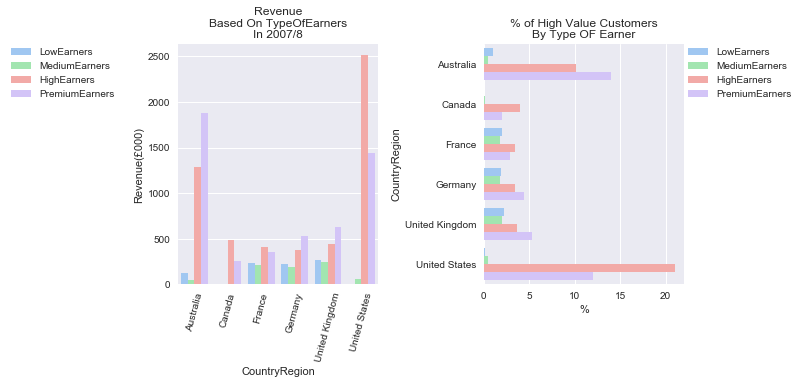

In [154]:
# High Value Customers By Income
# First plot
plt.subplot(1,2,1)
# Create a groupby that list the total sum of unit price for each TypeOfEarner for every country region 
hv_earner_groupby = (high_cust.groupby(['CountryRegion','TypeOfEarner'])['UnitPrice'].sum())
# Divide by 1,000 to make visualisation easier to read
hv_earner_groupby = hv_earner_groupby/1000
# Convert variable to an integer
hv_earner_groupby = hv_earner_groupby.astype(int)

# Create a hue order of 4 different types of earners 
hue_order  = ['LowEarners','MediumEarners','HighEarners','PremiumEarners']

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion' 
# and a y axis of 'UnitPrice' in the order of the 4 TypeOfEarner groups
ax = hv_earner_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='UnitPrice', palette='pastel', hue='TypeOfEarner', hue_order=hue_order)
plt.xticks(rotation=75)
plt.xlabel('CountryRegion')
plt.ylabel('Revenue(£000)')
plt.title('Revenue'+ '\n' + 'Based On TypeOfEarners' + '\n' +'In 2007/8')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(-0.85,1), loc=2, borderaxespad=0.)

# Second plot
plt.subplot(1,2,2)
# Create a groupby that counts the number of customers for each TypeOfEarner group for every country region  
groupby_earner = (high_cust.groupby(['CountryRegion','TypeOfEarner'])['CustomerKey'].count())
# Sum the total number of customers as a denominator  
total_earner = groupby_earner.sum()
# Divide each TypeOfEarner group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place
hv_earner = round(groupby_earner/total_earner*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CustomerKey'
# and a y axis of 'CountryRegion' in the order of the 4 TypeOfEarner groups
ax = hv_earner.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='CustomerKey', palette='pastel', hue='TypeOfEarner', hue_order=hue_order)
plt.xlabel('%')
plt.ylabel('CountryRegion')
plt.title('% of High Value Customers' + '\n' + 'By Type OF Earner') 
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)
    
plt.tight_layout()
plt.show()

## Description One 

For the countries, the High Earners are the most significant customers particularly in United States which contirbuted to nearly £5m. However, the Premium Earners in Australia, Germany and United Kingdom are the dominant players in terms of revenue.     

## Plot Two

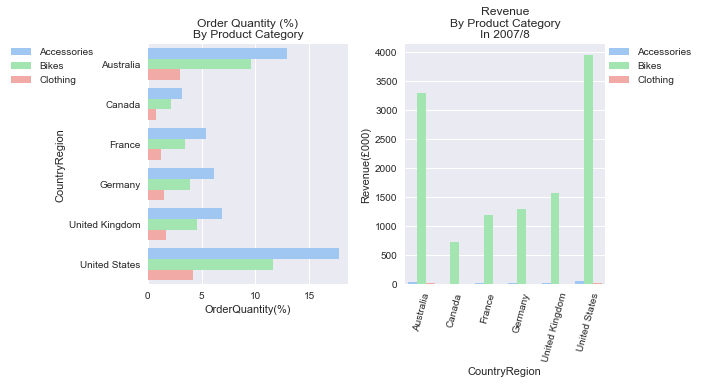

In [155]:
# What They Buy by Product Category
# First plot
plt.subplot(1,2,1)
# Create a groupby that list the total number of Order Quantity for each Product Category for every country region 
groupby_product = high_cust.groupby(['CountryRegion','ProductCategory'])['OrderQuantity'].sum()
# Sum the total number of Order Quantity as a denominator 
total_product = groupby_product.sum()
# Divide each Product Category group by the denominator and times by 100 to create a percentage 
# and round it by one decimal place
product = round(groupby_product/total_product*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'OrderQuantity'
# and a y axis of 'CountryRegion' in the order of the Product Category groups
ax = product.reset_index().pipe((sns.barplot, 'data'), 
y='CountryRegion', x='OrderQuantity', palette='pastel', hue='ProductCategory')
plt.xlabel('OrderQuantity(%)')
plt.ylabel('CountryRegion')
plt.title('Order Quantity (%)' + '\n' + 'By Product Category')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(-0.7,1), loc=2, borderaxespad=0.)

# Second plot
plt.subplot(1,2,2)
# Create a groupby that list the total sum of unit price for each Product Category for every country region 
hv_product_groupby = high_cust.groupby(['CountryRegion','ProductCategory'])['UnitPrice'].sum()
# Divide by 1,000 to make visualisation easier to read
hv_product_groupby = hv_product_groupby/1000
# Convert variable to an integer
hv_product_groupby = hv_product_groupby.astype(int)
# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion' 
# and a y axis of 'UnitPrice' in the order of the three Product Categories
ax = hv_product_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='UnitPrice', palette='pastel', hue='ProductCategory')
plt.xticks(rotation=75)
plt.ylabel('Revenue(£000)')
plt.title('Revenue'+'\n' + 'By Product Category' + '\n' +'In 2007/8')
# To locate and position the legend box 
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], labels[0:4], bbox_to_anchor=(1,1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.show()

## Description Two

The plot shows a majority of the sales are predominately Bikes. Many of the high value customers especially in Australia and United States each contributed to more than £7m in revenue. It is clear to say that Bikes will continue to be Kernal Ltd's main source of income.  

## Plot Three

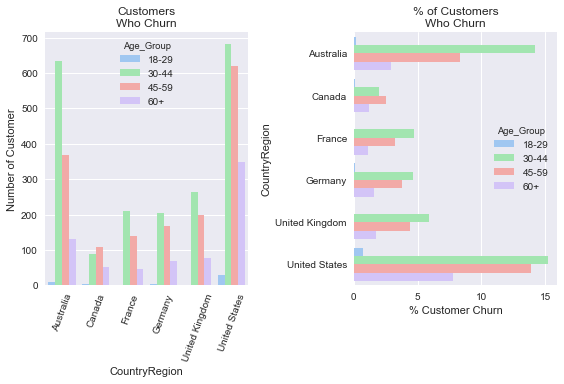

In [156]:
# Customer Churn 
# Create a groupby that list the total number of customer churns for each age group for every country region  
churn_groupby = (churn_cust_1.groupby(['CountryRegion','Age_Group'])['Churn_Flag'].count())

plt.subplot(1,2,1)
# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'CountryRegion' 
# and a y axis of 'UnitPrice' in the order of the 4 age groups
ax = churn_groupby.reset_index().pipe((sns.barplot, 'data'), 
x='CountryRegion', y='Churn_Flag', palette='pastel', hue='Age_Group')
plt.xticks(rotation=70)
plt.xlabel('CountryRegion')
plt.ylabel('Number of Customer')
plt.title('Customers' + '\n' +  'Who Churn')

plt.subplot(1,2,2)
# Sum the total number of customers as a denominator 
total_churn = churn_groupby.sum()
# Divide each age group by the denominator and times by 100 to create a percentage and round it by one decimal place
age_earner = round(churn_groupby/total_churn*100,1)

# Add pipeline to use the above groupby function and create a bar chart with an x axis of 'Churn_Flag'
# and a y axis of 'CountryRegion' in the order of the 4 Age groups
ax = age_earner.reset_index().pipe((sns.barplot, 'data'), 
x='Churn_Flag', y='CountryRegion', palette='pastel', hue='Age_Group')
plt.xlabel('% Customer Churn')

plt.ylabel('CountryRegion')
plt.title('% of Customers' + '\n' + 'Who Churn') 

plt.tight_layout()    
plt.show()

## Description Three

As customer churn is when an existing customer ends the business relationship meaning he/she no longer trades with Kernal Ltd. According to the plots above we can see that a majority of the customers are mainly from the age of 30-44 in green and 45-59 in pink. In United States over 15% of customers aged 30-44 never came back. For this reason, it is important that Kernal Ltd reduce the number customer churn in order to increase revenue such as reaching out to the customers, improving customer service, adding value to products etc.   

# Reflection

I finalised Kernal Ltd's dataset to 60,398 observations and 33 variables from 2007-2008. In order to prepare for this project I had to spend a lot of time planning as there are many different datasets that needed to be joined together. I also had to carefully pick and choose the variables as many of them were not relevant and useful for my analysis. After learning more about the dataset I managed to think of interesting questions as I carried on analysing.

Here are a list of interesting insights after completing my exploratory data analysis:

- Bikes bring in the most revenue even though Accessories were sold the most

- Road bikes are the most popular except for Mountain bikes which sells better in United States 

- Sales demand in Australia decreases in December and also the weekend in general

- A high number of customers in Australia do not have any children

- Customers aged 30-44 contributed the most revenue in Australia, France and United States. However, customers aged 45-59 in Canada, Germany and United Kingdom are more profitable. 

- Customers who work in Clerical are the most profitable in France, Germany and United Kingdom 

- Tires and Tubes in United States, Australia and Canada are the most popular whereas customers in United Kingdom, Germany and France tend to buy Bottles and Cages the most.

- Jerseys are customers' favourite in United States, Australia, France and Canada. However, Caps are the number one favourite in United Kingdom and Germany.

- Customers commute shorter distance (0-1 Mile) in all countries and customers in Australia commute longer distance the most (10+ miles). 

- Customers tend to purchase Road Cottle Cages and Water Bottles together whereas in Canada customers buy Mountain Bottle Cages and Water Bottles instead

According to the above findings I was able to create a customer profile based on what type of customers that Kernal Ltd should aim as their target market for each region. Although there will be other factors that might affect and change the customers' profiles externally and internally. 

Current Issues after my analysis:

- Low Awareness
- Lack of events 
- Not family friendly 
- No Social Media 

Actionable Recommendations:

- Market on younger people (18-29 years of age) as less sales were made by them 
- Hold competitions/charity events to inspire the young community to get into biking
- Sell family friendly packages to encourage young parents to go biking and also those with children. 
- Advertise on social media for summer sales especially during July and August 
- Promote more on touring bikes during summer sales and sell old stocks to boost revenue and more room for new stocks
- Offer last minute offers on Fridays and weekends.
- Offer tailored advice, servicing and support to fellow bike enthusiasts